# Design CTP-14 human genome DNA-MERFISH library 

by Pu Zheng

2022.10.14


# Table of contents


> 0. [Minimum required packages and settings](#0)
>>
>> 0.1: [import required packages](#0.1)
>
> 1. [Extract region sequences](#1)

In [1]:
%run "..\..\Startup_py3.py"
sys.path.append(r"..\..\..\..\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *
print(os.getpid())

# library design specific tools
from ImageAnalysis3.library_tools import LibraryDesigner as ld
from ImageAnalysis3.library_tools import LibraryTools as lt
# biopython imports
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio.Blast.Applications import NcbiblastnCommandline
from Bio.Blast import NCBIXML


15680


# Folders

In [2]:
## Some folders
# human genome
reference_folder = r'\\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\Genomes\human\hg38'
genome_folder = os.path.join(reference_folder, 'Genome')
# Library directories
pool_folder = r'\\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain'
if not os.path.exists(pool_folder):
    print(f"Create pool_folder: {pool_folder}")
    os.makedirs(pool_folder)
else:
    print(f"Use pool_folder: {pool_folder}")

Use pool_folder: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain


In [3]:
resolution = 0
flanking = 10000
# folder for sub-pool
library_folder = os.path.join(pool_folder, f'human_brain_promoter_enhancer')
if not os.path.exists(library_folder):
    print(f"create library folder: {library_folder}")
    os.makedirs(library_folder)
# folder to save result probes
report_folder = os.path.join(library_folder, 'reports')
if not os.path.exists(report_folder):
    print(f"create report folder: {report_folder}")
    os.makedirs(report_folder)
    
print(f"-- library_folder: {library_folder}")
print(f"-- report_folder: {report_folder}")

-- library_folder: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brain_promoter_enhancer
-- report_folder: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brain_promoter_enhancer\reports


In [4]:
promoter_probe_savefile = os.path.join(report_folder, f'marker_gene_tss_probes.pbr')
enhancer_probe_savefile = os.path.join(report_folder, f'hSE_probes.pbr')


## Load probe reports from here:

In [5]:
from ImageAnalysis3 import library_tools

In [6]:
# Parse segemented list
_promoter_pbde = library_tools.design.pb_reports_class()
_promoter_pbde.load_from_file(promoter_probe_savefile)

- Loading from savefile: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brain_promoter_enhancer\reports\marker_gene_tss_probes.pbr.
- loading cand_probes from file
- loading kept_probes from file
- 87088 filtered probes loaded
- loading sequence_dic from file
- loading map_dic from file
- loading params_dic from file
- loading check_dic from file
- loading save_file from file


True

In [7]:
# Parse segemented list
_enhancer_pbde = library_tools.design.pb_reports_class()
_enhancer_pbde.load_from_file(enhancer_probe_savefile)

- Loading from savefile: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brain_promoter_enhancer\reports\hSE_probes.pbr.
- loading cand_probes from file
- loading kept_probes from file
- 265626 filtered probes loaded
- loading sequence_dic from file
- loading map_dic from file
- loading params_dic from file
- loading check_dic from file
- loading save_file from file


True

In [13]:
cand_prob_nums = []
pb_dict = {}

#
verbose = True


In [14]:
# add promoters first
gene_names = np.sort(np.unique([_v['reg_name'].split('gene_')[1] for _s, _v in _promoter_pbde.kept_probes.items()]))
for _gene_name in gene_names:
    _sel_pbs = {_s:_v for _s, _v in _promoter_pbde.kept_probes.items() 
                if _v['reg_name'].split('gene_')[1]==_gene_name}
    
    if len(_sel_pbs) > 0:
        cand_prob_nums.append(len(_sel_pbs))
        if verbose:
            print(f"-- appending region:{_gene_name} with {len(_sel_pbs)} probes")
        _splitted_pbde = ld.pb_reports_class()
        _splitted_pbde.kept_probes = _sel_pbs
        pb_dict[_gene_name] = _splitted_pbde

-- appending region:ABCA8 with 136 probes
-- appending region:ABCG2 with 83 probes
-- appending region:ACSBG1 with 177 probes
-- appending region:ACSS1 with 259 probes
-- appending region:ACTA2 with 206 probes
-- appending region:ADAM28 with 124 probes
-- appending region:ADAM3A with 95 probes
-- appending region:ADAMTS2 with 280 probes
-- appending region:ADAMTS4 with 234 probes
-- appending region:ADCY4 with 256 probes
-- appending region:ADGRF5 with 224 probes
-- appending region:ADRA1B with 226 probes
-- appending region:AGT with 207 probes
-- appending region:ALK with 233 probes
-- appending region:ALOX5AP with 224 probes
-- appending region:ANK1 with 229 probes
-- appending region:ANKFN1 with 142 probes
-- appending region:ANO3 with 142 probes
-- appending region:ANO4 with 190 probes
-- appending region:APBB1IP with 167 probes
-- appending region:AQP4 with 215 probes
-- appending region:ARL4C with 248 probes
-- appending region:ARPP19 with 139 probes
-- appending region:ARPP21 wi

-- appending region:ITIH5 with 197 probes
-- appending region:KALRN with 188 probes
-- appending region:KCNG1 with 230 probes
-- appending region:KCNH8 with 197 probes
-- appending region:KCNIP4-IT1 with 191 probes
-- appending region:KCNJ8 with 162 probes
-- appending region:KIAA1755 with 176 probes
-- appending region:KIF13A with 175 probes
-- appending region:KLF5 with 160 probes
-- appending region:KLK6 with 171 probes
-- appending region:L3MBTL4 with 186 probes
-- appending region:LAMA3 with 151 probes
-- appending region:LAMP5 with 240 probes
-- appending region:LAPTM5 with 241 probes
-- appending region:LDB2 with 211 probes
-- appending region:LEF1 with 234 probes
-- appending region:LGI2 with 241 probes
-- appending region:LHX6 with 263 probes
-- appending region:LMO1 with 234 probes
-- appending region:LMO3 with 208 probes
-- appending region:LMO4 with 242 probes
-- appending region:LPAR5 with 191 probes
-- appending region:LRATD2 with 214 probes
-- appending region:LSP1 with 

-- appending region:TBX18 with 220 probes
-- appending region:TBX2 with 281 probes
-- appending region:TBX3 with 286 probes
-- appending region:TBXAS1 with 247 probes
-- appending region:TCAP with 272 probes
-- appending region:TENM3 with 221 probes
-- appending region:TESPA1 with 195 probes
-- appending region:TGM2 with 239 probes
-- appending region:TH with 266 probes
-- appending region:THBS2 with 226 probes
-- appending region:TIMP2 with 219 probes
-- appending region:TIMP3 with 264 probes
-- appending region:TLE4 with 222 probes
-- appending region:TM4SF1 with 203 probes
-- appending region:TM4SF18 with 189 probes
-- appending region:TMEM144 with 181 probes
-- appending region:TMEM163 with 232 probes
-- appending region:TMEM63A with 213 probes
-- appending region:TNFAIP6 with 162 probes
-- appending region:TNFSF10 with 162 probes
-- appending region:TOX with 213 probes
-- appending region:TRABD2A with 189 probes
-- appending region:TREM2 with 220 probes
-- appending region:TRIM59 

In [15]:
# add enhancers first
gene_names = np.sort(np.unique([_v['reg_name'].split('gene_')[1] for _s, _v in _enhancer_pbde.kept_probes.items()]))
for _gene_name in gene_names:
    _sel_pbs = {_s:_v for _s, _v in _enhancer_pbde.kept_probes.items() 
                if _v['reg_name'].split('gene_')[1]==_gene_name}
    
    if len(_sel_pbs) > 0:
        cand_prob_nums.append(len(_sel_pbs))
        if verbose:
            print(f"-- appending region:{_gene_name} with {len(_sel_pbs)} probes")
        _splitted_pbde = ld.pb_reports_class()
        _splitted_pbde.kept_probes = _sel_pbs
        pb_dict[_gene_name] = _splitted_pbde

-- appending region:hSE-0 with 162 probes
-- appending region:hSE-1 with 464 probes
-- appending region:hSE-10 with 437 probes
-- appending region:hSE-100 with 348 probes
-- appending region:hSE-101 with 495 probes
-- appending region:hSE-102 with 303 probes
-- appending region:hSE-103 with 609 probes
-- appending region:hSE-104 with 395 probes
-- appending region:hSE-105 with 424 probes
-- appending region:hSE-106 with 376 probes
-- appending region:hSE-107 with 960 probes
-- appending region:hSE-108 with 617 probes
-- appending region:hSE-109 with 379 probes
-- appending region:hSE-11 with 671 probes
-- appending region:hSE-110 with 478 probes
-- appending region:hSE-111 with 211 probes
-- appending region:hSE-112 with 920 probes
-- appending region:hSE-113 with 340 probes
-- appending region:hSE-114 with 304 probes
-- appending region:hSE-115 with 390 probes
-- appending region:hSE-116 with 307 probes
-- appending region:hSE-117 with 587 probes
-- appending region:hSE-118 with 789 p

-- appending region:hSE-27 with 518 probes
-- appending region:hSE-270 with 300 probes
-- appending region:hSE-271 with 462 probes
-- appending region:hSE-272 with 730 probes
-- appending region:hSE-273 with 356 probes
-- appending region:hSE-274 with 640 probes
-- appending region:hSE-275 with 635 probes
-- appending region:hSE-276 with 591 probes
-- appending region:hSE-277 with 611 probes
-- appending region:hSE-278 with 724 probes
-- appending region:hSE-279 with 711 probes
-- appending region:hSE-28 with 388 probes
-- appending region:hSE-280 with 991 probes
-- appending region:hSE-281 with 385 probes
-- appending region:hSE-282 with 608 probes
-- appending region:hSE-283 with 357 probes
-- appending region:hSE-284 with 669 probes
-- appending region:hSE-285 with 402 probes
-- appending region:hSE-286 with 580 probes
-- appending region:hSE-287 with 843 probes
-- appending region:hSE-288 with 570 probes
-- appending region:hSE-289 with 305 probes
-- appending region:hSE-29 with 47

-- appending region:hSE-440 with 432 probes
-- appending region:hSE-441 with 591 probes
-- appending region:hSE-442 with 544 probes
-- appending region:hSE-443 with 498 probes
-- appending region:hSE-445 with 592 probes
-- appending region:hSE-446 with 299 probes
-- appending region:hSE-447 with 425 probes
-- appending region:hSE-448 with 294 probes
-- appending region:hSE-449 with 683 probes
-- appending region:hSE-45 with 497 probes
-- appending region:hSE-450 with 122 probes
-- appending region:hSE-451 with 687 probes
-- appending region:hSE-452 with 773 probes
-- appending region:hSE-453 with 873 probes
-- appending region:hSE-454 with 357 probes
-- appending region:hSE-455 with 103 probes
-- appending region:hSE-456 with 710 probes
-- appending region:hSE-457 with 519 probes
-- appending region:hSE-458 with 696 probes
-- appending region:hSE-459 with 721 probes
-- appending region:hSE-46 with 363 probes
-- appending region:hSE-460 with 453 probes
-- appending region:hSE-461 with 5

In [19]:
len(pb_dict)

996

In [18]:
# filter by genome counts
reload(library_tools.quality_check)

num_probes_kept = 400 # max num of probes kept for each region
filtered_pb_dict = library_tools.quality_check.Screen_probe_by_hit(library_folder, pb_dict, num_probes_kept,
                                                                  hit_type='genome')

## filter by minimum number of probes in each region
min_num_probes = 50
removed_regions = []
for _rid, _pb_class in filtered_pb_dict.items():
    if len(_pb_class.kept_probes) < min_num_probes:
        print(f"region: {_rid} removed with {len(_pb_class.kept_probes)} probes")
        removed_regions.append(_rid)
for _rid in removed_regions:
    del(filtered_pb_dict[_rid])

- Screen probes by genome counts.
-- filtering region:ABCA8, directly append 136 probes
-- filtering region:ABCG2, directly append 83 probes
-- filtering region:ACSBG1, directly append 177 probes
-- filtering region:ACSS1, directly append 259 probes
-- filtering region:ACTA2, directly append 206 probes
-- filtering region:ADAM28, directly append 124 probes
-- filtering region:ADAM3A, directly append 95 probes
-- filtering region:ADAMTS2, directly append 280 probes
-- filtering region:ADAMTS4, directly append 234 probes
-- filtering region:ADCY4, directly append 256 probes
-- filtering region:ADGRF5, directly append 224 probes
-- filtering region:ADRA1B, directly append 226 probes
-- filtering region:AGT, directly append 207 probes
-- filtering region:ALK, directly append 233 probes
-- filtering region:ALOX5AP, directly append 224 probes
-- filtering region:ANK1, directly append 229 probes
-- filtering region:ANKFN1, directly append 142 probes
-- filtering region:ANO3, directly append 1

-- filtering region:hSE-182, screen genome to keep 400 probes
-- filtering region:hSE-183, screen genome to keep 400 probes
-- filtering region:hSE-184, screen genome to keep 400 probes
-- filtering region:hSE-185, screen genome to keep 400 probes
-- filtering region:hSE-186, screen genome to keep 400 probes
-- filtering region:hSE-187, directly append 313 probes
-- filtering region:hSE-188, screen genome to keep 400 probes
-- filtering region:hSE-189, screen genome to keep 400 probes
-- filtering region:hSE-19, screen genome to keep 400 probes
-- filtering region:hSE-190, screen genome to keep 400 probes
-- filtering region:hSE-191, screen genome to keep 400 probes
-- filtering region:hSE-192, directly append 142 probes
-- filtering region:hSE-193, screen genome to keep 400 probes
-- filtering region:hSE-194, screen genome to keep 400 probes
-- filtering region:hSE-195, directly append 5 probes
-- filtering region:hSE-196, screen genome to keep 400 probes
-- filtering region:hSE-197, 

-- filtering region:hSE-406, screen genome to keep 400 probes
-- filtering region:hSE-407, screen genome to keep 400 probes
-- filtering region:hSE-408, screen genome to keep 400 probes
-- filtering region:hSE-409, screen genome to keep 400 probes
-- filtering region:hSE-41, screen genome to keep 400 probes
-- filtering region:hSE-410, directly append 278 probes
-- filtering region:hSE-411, screen genome to keep 400 probes
-- filtering region:hSE-412, directly append 348 probes
-- filtering region:hSE-413, screen genome to keep 400 probes
-- filtering region:hSE-414, directly append 390 probes
-- filtering region:hSE-415, screen genome to keep 400 probes
-- filtering region:hSE-416, screen genome to keep 400 probes
-- filtering region:hSE-417, screen genome to keep 400 probes
-- filtering region:hSE-418, screen genome to keep 400 probes
-- filtering region:hSE-419, screen genome to keep 400 probes
-- filtering region:hSE-42, screen genome to keep 400 probes
-- filtering region:hSE-421,

-- filtering region:hSE-542, directly append 316 probes
-- filtering region:hSE-543, screen genome to keep 400 probes
-- filtering region:hSE-544, screen genome to keep 400 probes
-- filtering region:hSE-545, screen genome to keep 400 probes
-- filtering region:hSE-546, directly append 327 probes
-- filtering region:hSE-547, directly append 391 probes
-- filtering region:hSE-548, screen genome to keep 400 probes
-- filtering region:hSE-549, directly append 274 probes
-- filtering region:hSE-55, screen genome to keep 400 probes
-- filtering region:hSE-550, screen genome to keep 400 probes
-- filtering region:hSE-551, directly append 3 probes
-- filtering region:hSE-552, directly append 300 probes
-- filtering region:hSE-554, screen genome to keep 400 probes
-- filtering region:hSE-555, screen genome to keep 400 probes
-- filtering region:hSE-556, screen genome to keep 400 probes
-- filtering region:hSE-557, screen genome to keep 400 probes
-- filtering region:hSE-558, screen genome to k

In [20]:
len(filtered_pb_dict)

981

<IPython.core.display.Javascript object>


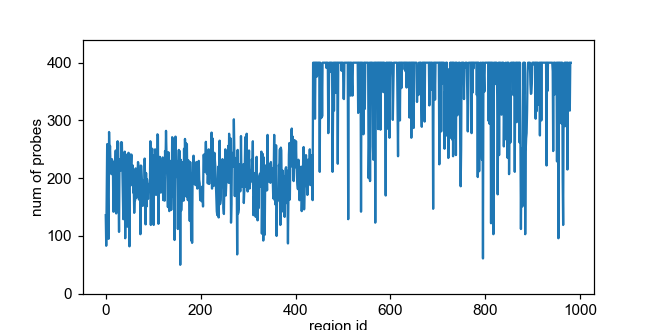

In [21]:
pb_num_dict = {_k:len(_v.kept_probes) for _k,_v in filtered_pb_dict.items()}

pb_nums = np.array(list(pb_num_dict.values()))
plt.figure(figsize=(6,3), dpi=100)
plt.plot(pb_nums)
#plt.plot(np.ones(len(pb_nums))*20)
plt.ylabel(f"num of probes", labelpad=1)
plt.xlabel(f"region id", labelpad=1)
plt.ylim([0, num_probes_kept*1.1])
plt.show()

In [24]:
chr_2_region_savefile = os.path.join(library_folder, 'chr_2_final_region_num.pkl')
overwrite = False

if not os.path.exists(chr_2_region_savefile) or overwrite:
    filtered_reg_names = {}
    for _reg, _pbde in filtered_pb_dict.items():
        if len(_pbde.kept_probes) > 0:
            filtered_reg_names[_reg] = list(_pbde.kept_probes.values())[0]['reg_name']

    chr_2_region_num = {}
    for _reg, _info in filtered_reg_names.items():
        _chr = _info.split('_')[0].split(':')[0]
        if _chr not in chr_2_region_num:
            chr_2_region_num[_chr] = 1
        else:
            chr_2_region_num[_chr] += 1
    pickle.dump(chr_2_region_num, open(chr_2_region_savefile, 'wb'))
else:
    print(f"loading from file: {chr_2_region_savefile}")
    chr_2_region_num = pickle.load(open(chr_2_region_savefile, 'rb'))

loading from file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brain_promoter_enhancer\chr_2_final_region_num.pkl


In [26]:
print(chr_2_region_num)

{'17': 42, '4': 52, '15': 28, '20': 38, '10': 41, '8': 41, '5': 67, '1': 103, '14': 36, '6': 49, '2': 68, '13': 17, '11': 59, '12': 56, '18': 20, '3': 70, 'X': 6, '19': 28, '7': 54, '16': 41, '9': 34, '21': 9, '22': 22}


In [ ]:
chr_2_sorted_region_names = {}

for _reg, _info in filtered_reg_names

In [35]:
reg_2_start = {}

for _name, _info in filtered_reg_names.items():
    _locus = _info.split('_')[0]
    _start,_end = _locus.split(':')[1].split('-')
    reg_2_start[_name] = int(_start)
    

In [42]:
chr_2_region_names = {}
for _reg, _info in filtered_reg_names.items():
    _chr = _info.split('_')[0].split(':')[0]
    if _chr not in chr_2_region_names:
        chr_2_region_names[_chr] = [_reg]
    else:
        chr_2_region_names[_chr].append(_reg)
# sort
for _chr, _regs in chr_2_region_names.items():
    _sorted_regs = sorted(_regs, key=lambda _r: reg_2_start[_r])
    chr_2_region_names[_chr] = _sorted_regs

In [44]:
chr_2_region_name_savefile = os.path.join(library_folder, 'chr_2_region_names.pkl')
print(chr_2_region_name_savefile)
pickle.dump(chr_2_region_names, open(chr_2_region_name_savefile, 'wb'))

\\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brain_promoter_enhancer\chr_2_region_names.pkl


In [30]:
# clear memory
del(_pbde)
del(_pb_class)

<a id='3'></a>
# 3. Load and asssemble probes

<a id='3.1'></a>
## 3.1 design readout mapping dict (region_to_readout)

load directly from http://localhost:8888/notebooks/Chromatin_Analysis_Scripts/Library_design/CTP-14-human_brain_genome/Design_CTP14-promoter_enhancer_codebook.ipynb

<a id='3.2'></a>
## 3.2 loading components

### primers
pick primer set 6,11

In [45]:
from ImageAnalysis3 import library_tools
primer_folder = r'\\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\Primers'
primers = library_tools.assemble.load_primers([6,11], _primer_folder=primer_folder)

- Picked primer: ID: W1A07_primer_6
Name: W1A07_primer_6
Description: W1A07_primer_6
Number of features: 0
Seq('CGCAAACTGGTGCGGAAGGC')
- Picked primer: ID: W1A12_primer_11
Name: W1A12_primer_11
Description: W1A12_primer_11
Number of features: 0
Seq('TAATACGACTCACTATAGGGCCATTGCCCGCGAGGTCGAG')


### readouts

In [46]:
# summarize total readout usage
region_2_readout_dict = pickle.load(open(os.path.join(library_folder, 'region_2_readout.pkl'), 'rb'))

In [47]:
region_2_readout_dict

{'hSE-0': ['c17', 'c28', 'c64'],
 'PRDM16': ['c10', 'c34', 'c77'],
 'hSE-1': ['c9', 'c82', 'c93'],
 'hSE-2': ['c6', 'c7', 'c16'],
 'hSE-3': ['c27', 'c32', 'c33'],
 'hSE-4': ['c29', 'c39', 'c53'],
 'hSE-5': ['c15', 'c71', 'c79'],
 'hSE-6': ['c18', 'c24', 'c73'],
 'hSE-7': ['c57', 'c86', 'c94'],
 'SRARP': ['c30', 'c70', 'c81'],
 'hSE-8': ['c23', 'c62', 'c65'],
 'hSE-9': ['c31', 'c45', 'c56'],
 'hSE-10': ['c46', 'c74', 'c84'],
 'C1QC': ['c55', 'c58', 'c76'],
 'C1QB': ['c36', 'c54', 'c75'],
 'hSE-11': ['c8', 'c12', 'c38'],
 'hSE-12': ['c61', 'c68', 'c90'],
 'ID3': ['c17', 'c33', 'c47'],
 'hSE-13': ['c6', 'c42', 'c91'],
 'CD52': ['c11', 'c50', 'c51'],
 'hSE-14': ['c3', 'c48', 'c52'],
 'PTPRU': ['c15', 'c21', 'c31'],
 'hSE-15': ['c1', 'c14', 'c19'],
 'hSE-16': ['c44', 'c53', 'c87'],
 'LAPTM5': ['c10', 'c81', 'c83'],
 'MARCKSL1': ['c20', 'c66', 'c85'],
 'hSE-17': ['c22', 'c26', 'c30'],
 'hSE-18': ['c46', 'c49', 'c92'],
 'hSE-19': ['c29', 'c43', 'c76'],
 'hSE-20': ['c34', 'c50', 'c80'],
 'CSF3

In [48]:
# collect types
readout_usage_by_type = {}
for _region, _infos in region_2_readout_dict.items():
    for _info in _infos:
        if _info[0] not in readout_usage_by_type:
            readout_usage_by_type[_info[0]] = []
        if int(_info[1:]) not in readout_usage_by_type[_info[0]]:
            readout_usage_by_type[_info[0]].append(int(_info[1:]))

In [49]:
readout_usage_dict = {_type:len(_v) for _type,_v in readout_usage_by_type.items()}
readout_dict ={}

In [56]:
reload(library_tools.assemble)
overwrite_readout_usage = True
readout_folder = r'\\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\Readouts'
readout_start = 0
num_color = 2
comb_readouts = library_tools.assemble.load_readouts(readout_usage_dict['c'], 
                                                       _type='snr_before_630', 
                                                       _readout_folder=readout_folder, 
                                                       _num_colors=2, _start_channel=0, # 750, 647
                                                       _start_id=readout_start,
                                                       )
readout_dict['c'] = comb_readouts

In [59]:
[_r.id for _r in comb_readouts]

['NDB_376',
 'NDB_578',
 'NDB_400',
 'NDB_533',
 'NDB_568',
 'NDB_464',
 'NDB_466',
 'NDB_431',
 'NDB_511',
 'NDB_554',
 'NDB_487',
 'NDB_458',
 'NDB_409',
 'NDB_443',
 'NDB_571',
 'NDB_455',
 'NDB_448',
 'NDB_470',
 'NDB_529',
 'NDB_332',
 'NDB_508',
 'NDB_536',
 'NDB_403',
 'NDB_461',
 'NDB_391',
 'NDB_398',
 'NDB_532',
 'NDB_467',
 'NDB_616',
 'NDB_335',
 'NDB_388',
 'NDB_506',
 'NDB_427',
 'NDB_347',
 'NDB_619',
 'NDB_482',
 'NDB_433',
 'NDB_446',
 'NDB_397',
 'NDB_473',
 'NDB_505',
 'NDB_539',
 'NDB_385',
 'NDB_452',
 'NDB_514',
 'NDB_356',
 'NDB_445',
 'NDB_587',
 'NDB_628',
 'NDB_551',
 'NDB_421',
 'NDB_557',
 'NDB_379',
 'NDB_491',
 'NDB_418',
 'NDB_401',
 'NDB_526',
 'NDB_611',
 'NDB_472',
 'NDB_341',
 'NDB_622',
 'NDB_386',
 'NDB_517',
 'NDB_392',
 'NDB_544',
 'NDB_614',
 'NDB_625',
 'NDB_395',
 'NDB_577',
 'NDB_359',
 'NDB_556',
 'NDB_581',
 'NDB_481',
 'NDB_350',
 'NDB_439',
 'NDB_371',
 'NDB_493',
 'NDB_476',
 'NDB_547',
 'NDB_428',
 'NDB_538',
 'NDB_365',
 'NDB_589',
 'ND

In [60]:
# save
readout_usage_file = os.path.join(library_folder, 'readout_usage.pkl')
if not os.path.isfile(readout_usage_file) or overwrite_readout_usage:
    print('save')
    pickle.dump(readout_dict, open(readout_usage_file, 'wb'))

save


<a id='3.3'></a>
## 3.3 assemble probes

In [61]:
reload(library_tools.assemble)
from ImageAnalysis3.library_tools.assemble import Assemble_probes

num_readout_per_probe = 4

cand_probes, readout_summary = Assemble_probes(library_folder, filtered_pb_dict, 
                                               region_2_readout_dict, readout_dict, primers, 
                                               primer_len=20, 
                                               num_readout_per_probe=num_readout_per_probe, 
                                               unique_readout_per_probe=True,
                                               rc_targets=False, overwrite=True)

- Assemble probes by given target sequences, readouts and primers.
-- included readout types: ['c']
--- assemblying 136 probes in region: ABCA8
--- assemblying 83 probes in region: ABCG2
--- assemblying 177 probes in region: ACSBG1
--- assemblying 259 probes in region: ACSS1
--- assemblying 206 probes in region: ACTA2
--- assemblying 124 probes in region: ADAM28
--- assemblying 95 probes in region: ADAM3A
--- assemblying 280 probes in region: ADAMTS2
--- assemblying 234 probes in region: ADAMTS4
--- assemblying 256 probes in region: ADCY4
--- assemblying 224 probes in region: ADGRF5
--- assemblying 226 probes in region: ADRA1B
--- assemblying 207 probes in region: AGT
--- assemblying 233 probes in region: ALK
--- assemblying 224 probes in region: ALOX5AP
--- assemblying 229 probes in region: ANK1
--- assemblying 142 probes in region: ANKFN1
--- assemblying 142 probes in region: ANO3
--- assemblying 190 probes in region: ANO4
--- assemblying 167 probes in region: APBB1IP
--- assemblying

--- assemblying 190 probes in region: IGFBP6
--- assemblying 195 probes in region: IKZF2
--- assemblying 194 probes in region: IL1RAPL2
--- assemblying 188 probes in region: IQGAP2
--- assemblying 195 probes in region: IRAG1
--- assemblying 228 probes in region: ITGA6
--- assemblying 208 probes in region: ITGAX
--- assemblying 182 probes in region: ITGB8
--- assemblying 197 probes in region: ITIH5
--- assemblying 188 probes in region: KALRN
--- assemblying 230 probes in region: KCNG1
--- assemblying 197 probes in region: KCNH8
--- assemblying 191 probes in region: KCNIP4-IT1
--- assemblying 162 probes in region: KCNJ8
--- assemblying 176 probes in region: KIAA1755
--- assemblying 175 probes in region: KIF13A
--- assemblying 160 probes in region: KLF5
--- assemblying 171 probes in region: KLK6
--- assemblying 186 probes in region: L3MBTL4
--- assemblying 151 probes in region: LAMA3
--- assemblying 240 probes in region: LAMP5
--- assemblying 241 probes in region: LAPTM5
--- assemblying 2

--- assemblying 167 probes in region: ST8SIA6
--- assemblying 133 probes in region: STXBP5L
--- assemblying 198 probes in region: SULF1
--- assemblying 216 probes in region: SULF2
--- assemblying 219 probes in region: SUSD3
--- assemblying 157 probes in region: SV2B
--- assemblying 213 probes in region: SVIL
--- assemblying 177 probes in region: SYK
--- assemblying 87 probes in region: SYNE2
--- assemblying 162 probes in region: SYT10
--- assemblying 241 probes in region: SYT6
--- assemblying 261 probes in region: SYT7
--- assemblying 163 probes in region: TAC1
--- assemblying 230 probes in region: TAL1
--- assemblying 220 probes in region: TBX18
--- assemblying 281 probes in region: TBX2
--- assemblying 286 probes in region: TBX3
--- assemblying 247 probes in region: TBXAS1
--- assemblying 272 probes in region: TCAP
--- assemblying 221 probes in region: TENM3
--- assemblying 195 probes in region: TESPA1
--- assemblying 239 probes in region: TGM2
--- assemblying 266 probes in region: T

--- assemblying 400 probes in region: hSE-211
--- assemblying 343 probes in region: hSE-212
--- assemblying 400 probes in region: hSE-213
--- assemblying 400 probes in region: hSE-214
--- assemblying 255 probes in region: hSE-215
--- assemblying 232 probes in region: hSE-216
--- assemblying 400 probes in region: hSE-217
--- assemblying 400 probes in region: hSE-218
--- assemblying 400 probes in region: hSE-219
--- assemblying 123 probes in region: hSE-22
--- assemblying 400 probes in region: hSE-220
--- assemblying 400 probes in region: hSE-221
--- assemblying 400 probes in region: hSE-222
--- assemblying 400 probes in region: hSE-223
--- assemblying 400 probes in region: hSE-224
--- assemblying 285 probes in region: hSE-225
--- assemblying 400 probes in region: hSE-226
--- assemblying 295 probes in region: hSE-227
--- assemblying 400 probes in region: hSE-228
--- assemblying 400 probes in region: hSE-229
--- assemblying 284 probes in region: hSE-23
--- assemblying 400 probes in region

--- assemblying 400 probes in region: hSE-383
--- assemblying 309 probes in region: hSE-384
--- assemblying 335 probes in region: hSE-385
--- assemblying 380 probes in region: hSE-386
--- assemblying 400 probes in region: hSE-387
--- assemblying 400 probes in region: hSE-388
--- assemblying 400 probes in region: hSE-389
--- assemblying 260 probes in region: hSE-39
--- assemblying 186 probes in region: hSE-390
--- assemblying 250 probes in region: hSE-391
--- assemblying 400 probes in region: hSE-392
--- assemblying 400 probes in region: hSE-393
--- assemblying 400 probes in region: hSE-394
--- assemblying 394 probes in region: hSE-395
--- assemblying 400 probes in region: hSE-396
--- assemblying 337 probes in region: hSE-397
--- assemblying 394 probes in region: hSE-398
--- assemblying 392 probes in region: hSE-399
--- assemblying 400 probes in region: hSE-4
--- assemblying 400 probes in region: hSE-40
--- assemblying 400 probes in region: hSE-400
--- assemblying 400 probes in region: 

--- assemblying 400 probes in region: hSE-555
--- assemblying 400 probes in region: hSE-556
--- assemblying 400 probes in region: hSE-557
--- assemblying 400 probes in region: hSE-558
--- assemblying 400 probes in region: hSE-559
--- assemblying 400 probes in region: hSE-56
--- assemblying 400 probes in region: hSE-560
--- assemblying 400 probes in region: hSE-561
--- assemblying 400 probes in region: hSE-562
--- assemblying 222 probes in region: hSE-563
--- assemblying 400 probes in region: hSE-564
--- assemblying 351 probes in region: hSE-565
--- assemblying 400 probes in region: hSE-566
--- assemblying 400 probes in region: hSE-567
--- assemblying 400 probes in region: hSE-57
--- assemblying 400 probes in region: hSE-58
--- assemblying 400 probes in region: hSE-59
--- assemblying 400 probes in region: hSE-6
--- assemblying 400 probes in region: hSE-60
--- assemblying 400 probes in region: hSE-61
--- assemblying 400 probes in region: hSE-62
--- assemblying 400 probes in region: hSE-6

# 4.Check quality


## 4.1 Load probes

Checking procedures could restart from here

In [62]:
# folder for this library
# candidate full-length probe filename
candidate_basename = 'candidate_probes.fasta' # old version
# load full probes
full_records = []
with open(os.path.join(library_folder, candidate_basename), 'r') as handle:
    for record in SeqIO.parse(handle, "fasta"):
        full_records.append(record)

print(f"Total probe loaded: {len(full_records)}")

Total probe loaded: 285245


### Manually input the following info to double check!

In [63]:
num_readout_per_probe = 4
primer_len=20
target_len=42
min_num_probes = 40
# merfish related
num_on_bits = 3### Manually input the following info to double check!

### 4.1.1 check primer usage

In [64]:
import ImageAnalysis3.library_tools.quality_check as check
reload(check)
primer_check = check._check_primer_usage(full_records, primers[0], primers[1], primer_len=primer_len)
print(primer_check)

-- Checking primer usage, total probes: 285245
True


### 4.1.2 check region probe number

In [65]:
reload(check)
reg_size_dic, len_check = check._check_region_size(full_records, 
                                                   min_size=min_num_probes)
print(len_check)

gene: ABCA8 -> 136
gene: ABCG2 -> 83
gene: ACSBG1 -> 177
gene: ACSS1 -> 259
gene: ACTA2 -> 206
gene: ADAM28 -> 124
gene: ADAM3A -> 95
gene: ADAMTS2 -> 280
gene: ADAMTS4 -> 234
gene: ADCY4 -> 256
gene: ADGRF5 -> 224
gene: ADRA1B -> 226
gene: AGT -> 207
gene: ALK -> 233
gene: ALOX5AP -> 224
gene: ANK1 -> 229
gene: ANKFN1 -> 142
gene: ANO3 -> 142
gene: ANO4 -> 190
gene: APBB1IP -> 167
gene: AQP4 -> 215
gene: ARL4C -> 248
gene: ARPP19 -> 139
gene: ARPP21 -> 181
gene: ARX -> 246
gene: ASIC4 -> 264
gene: ATP1B2 -> 148
gene: ATP2B1 -> 171
gene: B4GALNT2 -> 107
gene: B4GALNT3 -> 233
gene: BARX2 -> 218
gene: BCAS1 -> 213
gene: BCL11B -> 262
gene: BDNF -> 232
gene: BGN -> 262
gene: BLNK -> 219
gene: BMPR1B -> 172
gene: BST2 -> 129
gene: BTBD11 -> 214
gene: C10orf90 -> 159
gene: C1QB -> 246
gene: C1QC -> 96
gene: C1QL3 -> 209
gene: C1QTNF7 -> 228
gene: C3 -> 221
gene: C5orf38 -> 241
gene: C7 -> 116
gene: CABP1 -> 187
gene: CACNG5 -> 244
gene: CADPS2 -> 163
gene: CALB1 -> 82
gene: CALB2 -> 241
gen

<IPython.core.display.Javascript object>


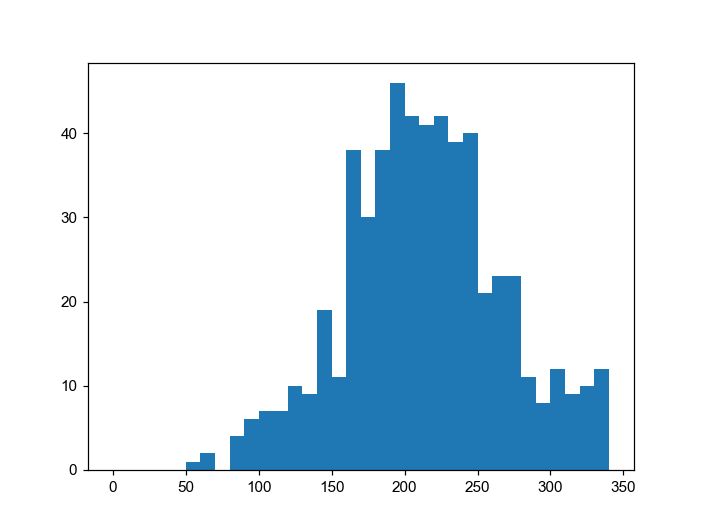

In [66]:
plt.figure()
plt.hist(list(reg_size_dic.values()), bins=np.arange(0,350,10))
plt.show()

### 4.1.3 check readout usage for each gene

In [67]:
reload(check)
check_readout_dict = pickle.load(open(os.path.join(library_folder, 'readout_usage.pkl'), 'rb'))

reg_readout_dic, reg2readout_check = check._check_region_to_readouts(full_records, check_readout_dict, 
                                                                     total_readout_num=num_on_bits)
print(reg2readout_check)

ABCA8 -> ['NDB_532', 'NDB_473', 'NDB_421']
ABCG2 -> ['NDB_517', 'NDB_544', 'NDB_428']
ACSBG1 -> ['NDB_557', 'NDB_625', 'NDB_538']
ACSS1 -> ['NDB_482', 'NDB_433', 'NDB_625']
ACTA2 -> ['NDB_395', 'NDB_581', 'NDB_608']
ADAM28 -> ['NDB_431', 'NDB_473', 'NDB_439']
ADAM3A -> ['NDB_568', 'NDB_466', 'NDB_563']
ADAMTS2 -> ['NDB_578', 'NDB_592', 'NDB_436']
ADAMTS4 -> ['NDB_551', 'NDB_421', 'NDB_629']
ADCY4 -> ['NDB_376', 'NDB_536', 'NDB_544']
ADGRF5 -> ['NDB_335', 'NDB_587', 'NDB_592']
ADRA1B -> ['NDB_529', 'NDB_526', 'NDB_371']
AGT -> ['NDB_431', 'NDB_409', 'NDB_365']
ALK -> ['NDB_529', 'NDB_421', 'NDB_418']
ALOX5AP -> ['NDB_421', 'NDB_386', 'NDB_476']
ANK1 -> ['NDB_398', 'NDB_619', 'NDB_526']
ANKFN1 -> ['NDB_431', 'NDB_539', 'NDB_577']
ANO3 -> ['NDB_491', 'NDB_611', 'NDB_395']
ANO4 -> ['NDB_554', 'NDB_622', 'NDB_428']
APBB1IP -> ['NDB_418', 'NDB_622', 'NDB_350']
AQP4 -> ['NDB_466', 'NDB_491', 'NDB_479']
ARL4C -> ['NDB_400', 'NDB_385', 'NDB_365']
ARPP19 -> ['NDB_508', 'NDB_481', 'NDB_368']
ARPP

### 4.1.4 check readout usage in the library

In [69]:
reload(check)
readout_reg_dic, readout2reg_check = check._check_readout_to_region(reg_readout_dic, full_records, 
                                                                    check_readout_dict, primer_len=primer_len, 
                                                                    target_len=target_len,
                                                                    probe_readout_num=num_readout_per_probe)
print(readout2reg_check)

-- extracting probes from >region:ABCA8, region:ABCG2, region:ACSBG1, region:ACSS1, region:ACTA2, region:ADAM28, region:ADAM3A, region:ADAMTS2, region:ADAMTS4, region:ADCY4, region:ADGRF5, region:ADRA1B, region:AGT, region:ALK, region:ALOX5AP, region:ANK1, region:ANKFN1, region:ANO3, region:ANO4, region:APBB1IP, region:AQP4, region:ARL4C, region:ARPP19, region:ARPP21, region:ARX, region:ASIC4, region:ATP1B2, region:ATP2B1, region:B4GALNT2, region:B4GALNT3, region:BARX2, region:BCAS1, region:BCL11B, region:BDNF, region:BGN, region:BLNK, region:BMPR1B, region:BST2, region:BTBD11, region:C10orf90, region:C1QB, region:C1QC, region:C1QL3, region:C1QTNF7, region:C3, region:C5orf38, region:C7, region:CABP1, region:CACNG5, region:CADPS2, region:CALB1, region:CALB2, region:CAMK2D, region:CARMN, region:CARNS1, region:CBLN2, region:CBLN4, region:CCBE1, region:CCDC3, region:CCDC80, region:CCNB1, region:CD14, region:CD22, region:CD248, region:CD52, region:CD74, region:CDCA7, region:CDCP1, region:CD

region:hSE-221, region:hSE-222, region:hSE-223, region:hSE-224, region:hSE-225, region:hSE-226, region:hSE-227, region:hSE-228, region:hSE-229, region:hSE-23, region:hSE-230, region:hSE-231, region:hSE-232, region:hSE-233, region:hSE-234, region:hSE-235, region:hSE-236, region:hSE-238, region:hSE-239, region:hSE-24, region:hSE-240, region:hSE-241, region:hSE-242, region:hSE-243, region:hSE-244, region:hSE-245, region:hSE-246, region:hSE-247, region:hSE-248, region:hSE-249, region:hSE-25, region:hSE-250, region:hSE-251, region:hSE-252, region:hSE-253, region:hSE-254, region:hSE-255, region:hSE-256, region:hSE-257, region:hSE-258, region:hSE-259, region:hSE-26, region:hSE-260, region:hSE-261, region:hSE-262, region:hSE-263, region:hSE-267, region:hSE-268, region:hSE-269, region:hSE-27, region:hSE-270, region:hSE-271, region:hSE-272, region:hSE-273, region:hSE-274, region:hSE-275, region:hSE-276, region:hSE-277, region:hSE-278, region:hSE-279, region:hSE-28, region:hSE-280, region:hSE-281

### 4.1.5 check bewteen probes

In [70]:
# construct internal map
reload(check)
int_map = check._construct_internal_map(full_records, library_folder, save=False) 

In [71]:
# internal check probes
readout_count_dic, readout_count_check = check._check_readout_in_probes(readout_reg_dic, reg_size_dic, int_map, readout_dict)
print(readout_count_check)

True


In [73]:
# check between probes
kept_records, removed_count = check._check_between_probes(full_records, int_map, 
                                                          primer_len=primer_len, 
                                                          target_len=target_len)

--- Sequence:loc_10:88981339-89001339_gene_ACTA2_pb_139_pos_14635_strand_-_readouts_[NDB_581_c,NDB_581_c,NDB_581_c,NDB_581_c]_primers_[W1A07_primer_6,W1A12_primer_11] got hits:65, dumped
--- Sequence:loc_2:219504170-219524170_gene_ASIC4_pb_29_pos_2229_strand_+_readouts_[NDB_563_c,NDB_563_c,NDB_563_c,NDB_563_c]_primers_[W1A07_primer_6,W1A12_primer_11] got hits:52, dumped
--- Sequence:loc_2:219504170-219524170_gene_ASIC4_pb_30_pos_2301_strand_+_readouts_[NDB_619_c,NDB_619_c,NDB_619_c,NDB_619_c]_primers_[W1A07_primer_6,W1A12_primer_11] got hits:52, dumped
--- Sequence:loc_2:219504170-219524170_gene_ASIC4_pb_31_pos_2385_strand_+_readouts_[NDB_418_c,NDB_418_c,NDB_418_c,NDB_418_c]_primers_[W1A07_primer_6,W1A12_primer_11] got hits:52, dumped
--- Sequence:loc_2:219504170-219524170_gene_ASIC4_pb_32_pos_2518_strand_+_readouts_[NDB_563_c,NDB_563_c,NDB_563_c,NDB_563_c]_primers_[W1A07_primer_6,W1A12_primer_11] got hits:52, dumped
--- Sequence:loc_2:219504170-219524170_gene_ASIC4_pb_33_pos_2592_stra

--- Sequence:loc_15:74816627-74836627_gene_CPLX3_pb_0_pos_11_strand_+_readouts_[NDB_400_c,NDB_400_c,NDB_400_c,NDB_400_c]_primers_[W1A07_primer_6,W1A12_primer_11] got hits:52, dumped
--- Sequence:loc_15:74816627-74836627_gene_CPLX3_pb_1_pos_55_strand_-_readouts_[NDB_511_c,NDB_511_c,NDB_511_c,NDB_511_c]_primers_[W1A07_primer_6,W1A12_primer_11] got hits:52, dumped
--- Sequence:loc_15:74816627-74836627_gene_CPLX3_pb_2_pos_99_strand_+_readouts_[NDB_443_c,NDB_443_c,NDB_443_c,NDB_443_c]_primers_[W1A07_primer_6,W1A12_primer_11] got hits:53, dumped
--- Sequence:loc_15:74816627-74836627_gene_CPLX3_pb_3_pos_189_strand_+_readouts_[NDB_400_c,NDB_400_c,NDB_400_c,NDB_400_c]_primers_[W1A07_primer_6,W1A12_primer_11] got hits:52, dumped
--- Sequence:loc_15:74816627-74836627_gene_CPLX3_pb_4_pos_264_strand_+_readouts_[NDB_511_c,NDB_511_c,NDB_511_c,NDB_511_c]_primers_[W1A07_primer_6,W1A12_primer_11] got hits:52, dumped
--- Sequence:loc_15:74816627-74836627_gene_CPLX3_pb_5_pos_320_strand_+_readouts_[NDB_443

--- Sequence:loc_4:1783293-1803293_gene_FGFR3_pb_1_pos_77_strand_+_readouts_[NDB_611_c,NDB_611_c,NDB_611_c,NDB_611_c]_primers_[W1A07_primer_6,W1A12_primer_11] got hits:52, dumped
--- Sequence:loc_4:1783293-1803293_gene_FGFR3_pb_2_pos_123_strand_+_readouts_[NDB_365_c,NDB_365_c,NDB_365_c,NDB_365_c]_primers_[W1A07_primer_6,W1A12_primer_11] got hits:52, dumped
--- Sequence:loc_4:1783293-1803293_gene_FGFR3_pb_3_pos_231_strand_+_readouts_[NDB_356_c,NDB_356_c,NDB_356_c,NDB_356_c]_primers_[W1A07_primer_6,W1A12_primer_11] got hits:52, dumped
--- Sequence:loc_4:1783293-1803293_gene_FGFR3_pb_4_pos_275_strand_+_readouts_[NDB_611_c,NDB_611_c,NDB_611_c,NDB_611_c]_primers_[W1A07_primer_6,W1A12_primer_11] got hits:52, dumped
--- Sequence:loc_4:1783293-1803293_gene_FGFR3_pb_5_pos_337_strand_+_readouts_[NDB_365_c,NDB_365_c,NDB_365_c,NDB_365_c]_primers_[W1A07_primer_6,W1A12_primer_11] got hits:52, dumped
--- Sequence:loc_4:1783293-1803293_gene_FGFR3_pb_6_pos_462_strand_+_readouts_[NDB_356_c,NDB_356_c,NDB

--- Sequence:loc_1:23549501-23569501_gene_ID3_pb_0_pos_87_strand_+_readouts_[NDB_470_c,NDB_470_c,NDB_470_c,NDB_470_c]_primers_[W1A07_primer_6,W1A12_primer_11] got hits:52, dumped
--- Sequence:loc_1:23549501-23569501_gene_ID3_pb_2_pos_245_strand_+_readouts_[NDB_587_c,NDB_587_c,NDB_587_c,NDB_587_c]_primers_[W1A07_primer_6,W1A12_primer_11] got hits:55, dumped
--- Sequence:loc_1:23549501-23569501_gene_ID3_pb_3_pos_293_strand_+_readouts_[NDB_470_c,NDB_470_c,NDB_470_c,NDB_470_c]_primers_[W1A07_primer_6,W1A12_primer_11] got hits:52, dumped
--- Sequence:loc_1:23549501-23569501_gene_ID3_pb_5_pos_519_strand_-_readouts_[NDB_587_c,NDB_587_c,NDB_587_c,NDB_587_c]_primers_[W1A07_primer_6,W1A12_primer_11] got hits:52, dumped
--- Sequence:loc_1:23549501-23569501_gene_ID3_pb_7_pos_666_strand_-_readouts_[NDB_347_c,NDB_347_c,NDB_347_c,NDB_347_c]_primers_[W1A07_primer_6,W1A12_primer_11] got hits:53, dumped
--- Sequence:loc_1:23549501-23569501_gene_ID3_pb_9_pos_814_strand_+_readouts_[NDB_470_c,NDB_470_c,NDB

--- Sequence:loc_3:42400610-42420610_gene_LYZL4_pb_1_pos_66_strand_+_readouts_[NDB_536_c,NDB_536_c,NDB_536_c,NDB_536_c]_primers_[W1A07_primer_6,W1A12_primer_11] got hits:52, dumped
--- Sequence:loc_3:42400610-42420610_gene_LYZL4_pb_2_pos_162_strand_-_readouts_[NDB_616_c,NDB_616_c,NDB_616_c,NDB_616_c]_primers_[W1A07_primer_6,W1A12_primer_11] got hits:52, dumped
--- Sequence:loc_3:42400610-42420610_gene_LYZL4_pb_3_pos_217_strand_+_readouts_[NDB_487_c,NDB_487_c,NDB_487_c,NDB_487_c]_primers_[W1A07_primer_6,W1A12_primer_11] got hits:51, dumped
--- Sequence:loc_3:42400610-42420610_gene_LYZL4_pb_4_pos_267_strand_+_readouts_[NDB_536_c,NDB_536_c,NDB_536_c,NDB_536_c]_primers_[W1A07_primer_6,W1A12_primer_11] got hits:52, dumped
--- Sequence:loc_3:42400610-42420610_gene_LYZL4_pb_5_pos_334_strand_+_readouts_[NDB_616_c,NDB_616_c,NDB_616_c,NDB_616_c]_primers_[W1A07_primer_6,W1A12_primer_11] got hits:52, dumped
--- Sequence:loc_3:42400610-42420610_gene_LYZL4_pb_6_pos_394_strand_+_readouts_[NDB_487_c,N

--- Sequence:loc_19:47009837-47029837_gene_NPAS1_pb_116_pos_17635_strand_-_readouts_[NDB_581_c,NDB_581_c,NDB_581_c,NDB_581_c]_primers_[W1A07_primer_6,W1A12_primer_11] got hits:52, dumped
--- Sequence:loc_19:47009837-47029837_gene_NPAS1_pb_117_pos_17746_strand_-_readouts_[NDB_376_c,NDB_376_c,NDB_376_c,NDB_376_c]_primers_[W1A07_primer_6,W1A12_primer_11] got hits:60, dumped
--- Sequence:loc_17:80467843-80487843_gene_NPTX1_pb_236_pos_19051_strand_+_readouts_[NDB_547_c,NDB_547_c,NDB_547_c,NDB_547_c]_primers_[W1A07_primer_6,W1A12_primer_11] got hits:52, dumped
--- Sequence:loc_17:80467843-80487843_gene_NPTX1_pb_237_pos_19110_strand_+_readouts_[NDB_554_c,NDB_554_c,NDB_554_c,NDB_554_c]_primers_[W1A07_primer_6,W1A12_primer_11] got hits:52, dumped
--- Sequence:loc_17:80467843-80487843_gene_NPTX1_pb_242_pos_19443_strand_+_readouts_[NDB_547_c,NDB_547_c,NDB_547_c,NDB_547_c]_primers_[W1A07_primer_6,W1A12_primer_11] got hits:52, dumped
--- Sequence:loc_17:80467843-80487843_gene_NPTX1_pb_243_pos_19490

--- Sequence:loc_11:279126-299126_gene_PGGHG_pb_104_pos_8269_strand_+_readouts_[NDB_446_c,NDB_446_c,NDB_446_c,NDB_446_c]_primers_[W1A07_primer_6,W1A12_primer_11] got hits:55, dumped
--- Sequence:loc_11:279126-299126_gene_PGGHG_pb_105_pos_8316_strand_+_readouts_[NDB_464_c,NDB_464_c,NDB_464_c,NDB_464_c]_primers_[W1A07_primer_6,W1A12_primer_11] got hits:70, dumped
--- Sequence:loc_11:279126-299126_gene_PGGHG_pb_106_pos_8505_strand_+_readouts_[NDB_506_c,NDB_506_c,NDB_506_c,NDB_506_c]_primers_[W1A07_primer_6,W1A12_primer_11] got hits:68, dumped
--- Sequence:loc_11:279126-299126_gene_PGGHG_pb_107_pos_8565_strand_+_readouts_[NDB_446_c,NDB_446_c,NDB_446_c,NDB_446_c]_primers_[W1A07_primer_6,W1A12_primer_11] got hits:58, dumped
--- Sequence:loc_11:279126-299126_gene_PGGHG_pb_108_pos_8628_strand_+_readouts_[NDB_464_c,NDB_464_c,NDB_464_c,NDB_464_c]_primers_[W1A07_primer_6,W1A12_primer_11] got hits:68, dumped
--- Sequence:loc_11:279126-299126_gene_PGGHG_pb_109_pos_8682_strand_+_readouts_[NDB_506_c,

--- Sequence:loc_4:82788796-82808796_gene_SCD5_pb_138_pos_15297_strand_+_readouts_[NDB_455_c,NDB_455_c,NDB_455_c,NDB_455_c]_primers_[W1A07_primer_6,W1A12_primer_11] got hits:52, dumped
--- Sequence:loc_4:82788796-82808796_gene_SCD5_pb_139_pos_15405_strand_-_readouts_[NDB_388_c,NDB_388_c,NDB_388_c,NDB_388_c]_primers_[W1A07_primer_6,W1A12_primer_11] got hits:52, dumped
--- Sequence:loc_4:82788796-82808796_gene_SCD5_pb_140_pos_15449_strand_+_readouts_[NDB_604_c,NDB_604_c,NDB_604_c,NDB_604_c]_primers_[W1A07_primer_6,W1A12_primer_11] got hits:52, dumped
--- Sequence:loc_4:82788796-82808796_gene_SCD5_pb_141_pos_15503_strand_+_readouts_[NDB_455_c,NDB_455_c,NDB_455_c,NDB_455_c]_primers_[W1A07_primer_6,W1A12_primer_11] got hits:52, dumped
--- Sequence:loc_4:82788796-82808796_gene_SCD5_pb_145_pos_15856_strand_+_readouts_[NDB_388_c,NDB_388_c,NDB_388_c,NDB_388_c]_primers_[W1A07_primer_6,W1A12_primer_11] got hits:52, dumped
--- Sequence:loc_4:82788796-82808796_gene_SCD5_pb_146_pos_15913_strand_+_re

--- Sequence:loc_1:225872380-225892380_gene_TMEM63A_pb_119_pos_12041_strand_+_readouts_[NDB_388_c,NDB_388_c,NDB_388_c,NDB_388_c]_primers_[W1A07_primer_6,W1A12_primer_11] got hits:52, dumped
--- Sequence:loc_1:225872380-225892380_gene_TMEM63A_pb_120_pos_12148_strand_+_readouts_[NDB_568_c,NDB_568_c,NDB_568_c,NDB_568_c]_primers_[W1A07_primer_6,W1A12_primer_11] got hits:51, dumped
--- Sequence:loc_1:225872380-225892380_gene_TMEM63A_pb_122_pos_12247_strand_+_readouts_[NDB_388_c,NDB_388_c,NDB_388_c,NDB_388_c]_primers_[W1A07_primer_6,W1A12_primer_11] got hits:52, dumped
--- Sequence:loc_1:225872380-225892380_gene_TMEM63A_pb_123_pos_12291_strand_+_readouts_[NDB_568_c,NDB_568_c,NDB_568_c,NDB_568_c]_primers_[W1A07_primer_6,W1A12_primer_11] got hits:51, dumped
--- Sequence:loc_1:225872380-225892380_gene_TMEM63A_pb_124_pos_12340_strand_+_readouts_[NDB_398_c,NDB_398_c,NDB_398_c,NDB_398_c]_primers_[W1A07_primer_6,W1A12_primer_11] got hits:51, dumped
--- Sequence:loc_1:225872380-225892380_gene_TMEM63

--- Sequence:loc_7:159134867-159154867_gene_VIPR2_pb_32_pos_2040_strand_+_readouts_[NDB_365_c,NDB_365_c,NDB_365_c,NDB_365_c]_primers_[W1A07_primer_6,W1A12_primer_11] got hits:102, dumped
--- Sequence:loc_7:159134867-159154867_gene_VIPR2_pb_33_pos_2185_strand_+_readouts_[NDB_464_c,NDB_464_c,NDB_464_c,NDB_464_c]_primers_[W1A07_primer_6,W1A12_primer_11] got hits:56, dumped
--- Sequence:loc_7:159134867-159154867_gene_VIPR2_pb_34_pos_2343_strand_-_readouts_[NDB_466_c,NDB_466_c,NDB_466_c,NDB_466_c]_primers_[W1A07_primer_6,W1A12_primer_11] got hits:107, dumped
--- Sequence:loc_7:159134867-159154867_gene_VIPR2_pb_35_pos_2412_strand_-_readouts_[NDB_365_c,NDB_365_c,NDB_365_c,NDB_365_c]_primers_[W1A07_primer_6,W1A12_primer_11] got hits:107, dumped
--- Sequence:loc_7:159134867-159154867_gene_VIPR2_pb_37_pos_2584_strand_+_readouts_[NDB_466_c,NDB_466_c,NDB_466_c,NDB_466_c]_primers_[W1A07_primer_6,W1A12_primer_11] got hits:101, dumped
--- Sequence:loc_7:159134867-159154867_gene_VIPR2_pb_38_pos_2638_s

--- Sequence:loc_3:133362559-133423952_gene_hSE-131_pb_287_pos_51551_strand_+_readouts_[NDB_493_c,NDB_493_c,NDB_493_c,NDB_493_c]_primers_[W1A07_primer_6,W1A12_primer_11] got hits:52, dumped
--- Sequence:loc_3:133362559-133423952_gene_hSE-131_pb_290_pos_51847_strand_+_readouts_[NDB_493_c,NDB_493_c,NDB_493_c,NDB_493_c]_primers_[W1A07_primer_6,W1A12_primer_11] got hits:51, dumped
--- Sequence:loc_3:133362559-133423952_gene_hSE-131_pb_295_pos_52183_strand_+_readouts_[NDB_539_c,NDB_539_c,NDB_539_c,NDB_539_c]_primers_[W1A07_primer_6,W1A12_primer_11] got hits:59, dumped
--- Sequence:loc_3:133362559-133423952_gene_hSE-131_pb_300_pos_52776_strand_+_readouts_[NDB_403_c,NDB_403_c,NDB_403_c,NDB_403_c]_primers_[W1A07_primer_6,W1A12_primer_11] got hits:84, dumped
--- Sequence:loc_3:133362559-133423952_gene_hSE-131_pb_301_pos_52903_strand_+_readouts_[NDB_539_c,NDB_539_c,NDB_539_c,NDB_539_c]_primers_[W1A07_primer_6,W1A12_primer_11] got hits:54, dumped
--- Sequence:loc_3:133362559-133423952_gene_hSE-13

--- Sequence:loc_3:195839395-195873780_gene_hSE-143_pb_215_pos_25068_strand_-_readouts_[NDB_608_c,NDB_608_c,NDB_608_c,NDB_608_c]_primers_[W1A07_primer_6,W1A12_primer_11] got hits:111, dumped
--- Sequence:loc_3:195839395-195873780_gene_hSE-143_pb_216_pos_25131_strand_-_readouts_[NDB_376_c,NDB_376_c,NDB_376_c,NDB_376_c]_primers_[W1A07_primer_6,W1A12_primer_11] got hits:109, dumped
--- Sequence:loc_3:195839395-195873780_gene_hSE-143_pb_217_pos_25204_strand_+_readouts_[NDB_494_c,NDB_494_c,NDB_494_c,NDB_494_c]_primers_[W1A07_primer_6,W1A12_primer_11] got hits:93, dumped
--- Sequence:loc_3:195839395-195873780_gene_hSE-143_pb_218_pos_25261_strand_-_readouts_[NDB_608_c,NDB_608_c,NDB_608_c,NDB_608_c]_primers_[W1A07_primer_6,W1A12_primer_11] got hits:73, dumped
--- Sequence:loc_3:195839395-195873780_gene_hSE-143_pb_219_pos_25410_strand_+_readouts_[NDB_376_c,NDB_376_c,NDB_376_c,NDB_376_c]_primers_[W1A07_primer_6,W1A12_primer_11] got hits:69, dumped
--- Sequence:loc_3:195839395-195873780_gene_hSE-

--- Sequence:loc_4:82698339-82793740_gene_hSE-152_pb_352_pos_90474_strand_-_readouts_[NDB_539_c,NDB_539_c,NDB_539_c,NDB_539_c]_primers_[W1A07_primer_6,W1A12_primer_11] got hits:52, dumped
--- Sequence:loc_4:82698339-82793740_gene_hSE-152_pb_353_pos_90575_strand_+_readouts_[NDB_479_c,NDB_479_c,NDB_479_c,NDB_479_c]_primers_[W1A07_primer_6,W1A12_primer_11] got hits:52, dumped
--- Sequence:loc_4:82698339-82793740_gene_hSE-152_pb_354_pos_90699_strand_+_readouts_[NDB_409_c,NDB_409_c,NDB_409_c,NDB_409_c]_primers_[W1A07_primer_6,W1A12_primer_11] got hits:52, dumped
--- Sequence:loc_4:82698339-82793740_gene_hSE-152_pb_355_pos_90766_strand_-_readouts_[NDB_539_c,NDB_539_c,NDB_539_c,NDB_539_c]_primers_[W1A07_primer_6,W1A12_primer_11] got hits:52, dumped
--- Sequence:loc_4:82698339-82793740_gene_hSE-152_pb_356_pos_90869_strand_-_readouts_[NDB_479_c,NDB_479_c,NDB_479_c,NDB_479_c]_primers_[W1A07_primer_6,W1A12_primer_11] got hits:52, dumped
--- Sequence:loc_4:82698339-82793740_gene_hSE-152_pb_359_pos

--- Sequence:loc_6:38134579-38180620_gene_hSE-217_pb_214_pos_31432_strand_+_readouts_[NDB_461_c,NDB_461_c,NDB_461_c,NDB_461_c]_primers_[W1A07_primer_6,W1A12_primer_11] got hits:55, dumped
--- Sequence:loc_6:38134579-38180620_gene_hSE-217_pb_216_pos_31751_strand_-_readouts_[NDB_400_c,NDB_400_c,NDB_400_c,NDB_400_c]_primers_[W1A07_primer_6,W1A12_primer_11] got hits:54, dumped
--- Sequence:loc_6:38134579-38180620_gene_hSE-217_pb_218_pos_31972_strand_+_readouts_[NDB_428_c,NDB_428_c,NDB_428_c,NDB_428_c]_primers_[W1A07_primer_6,W1A12_primer_11] got hits:60, dumped
--- Sequence:loc_6:167895708-167946464_gene_hSE-236_pb_349_pos_45546_strand_-_readouts_[NDB_397_c,NDB_397_c,NDB_397_c,NDB_397_c]_primers_[W1A07_primer_6,W1A12_primer_11] got hits:67, dumped
--- Sequence:loc_6:167895708-167946464_gene_hSE-236_pb_350_pos_45775_strand_-_readouts_[NDB_395_c,NDB_395_c,NDB_395_c,NDB_395_c]_primers_[W1A07_primer_6,W1A12_primer_11] got hits:76, dumped
--- Sequence:loc_6:167895708-167946464_gene_hSE-236_pb_3

--- Sequence:loc_8:134531678-134582535_gene_hSE-286_pb_101_pos_11538_strand_+_readouts_[NDB_592_c,NDB_592_c,NDB_592_c,NDB_592_c]_primers_[W1A07_primer_6,W1A12_primer_11] got hits:56, dumped
--- Sequence:loc_8:143485762-143532562_gene_hSE-289_pb_13_pos_968_strand_+_readouts_[NDB_395_c,NDB_395_c,NDB_395_c,NDB_395_c]_primers_[W1A07_primer_6,W1A12_primer_11] got hits:107, dumped
--- Sequence:loc_8:143485762-143532562_gene_hSE-289_pb_14_pos_1019_strand_-_readouts_[NDB_479_c,NDB_479_c,NDB_479_c,NDB_479_c]_primers_[W1A07_primer_6,W1A12_primer_11] got hits:144, dumped
--- Sequence:loc_8:143485762-143532562_gene_hSE-289_pb_15_pos_1244_strand_-_readouts_[NDB_529_c,NDB_529_c,NDB_529_c,NDB_529_c]_primers_[W1A07_primer_6,W1A12_primer_11] got hits:160, dumped
--- Sequence:loc_8:143485762-143532562_gene_hSE-289_pb_16_pos_1380_strand_-_readouts_[NDB_395_c,NDB_395_c,NDB_395_c,NDB_395_c]_primers_[W1A07_primer_6,W1A12_primer_11] got hits:192, dumped
--- Sequence:loc_8:143485762-143532562_gene_hSE-289_pb_

--- Sequence:loc_15:37079688-37111181_gene_hSE-428_pb_121_pos_11758_strand_-_readouts_[NDB_628_c,NDB_628_c,NDB_628_c,NDB_628_c]_primers_[W1A07_primer_6,W1A12_primer_11] got hits:51, dumped
--- Sequence:loc_15:37079688-37111181_gene_hSE-428_pb_122_pos_11809_strand_+_readouts_[NDB_604_c,NDB_604_c,NDB_604_c,NDB_604_c]_primers_[W1A07_primer_6,W1A12_primer_11] got hits:52, dumped
--- Sequence:loc_15:37079688-37111181_gene_hSE-428_pb_124_pos_12033_strand_-_readouts_[NDB_628_c,NDB_628_c,NDB_628_c,NDB_628_c]_primers_[W1A07_primer_6,W1A12_primer_11] got hits:51, dumped
--- Sequence:loc_15:37079688-37111181_gene_hSE-428_pb_126_pos_12304_strand_-_readouts_[NDB_409_c,NDB_409_c,NDB_409_c,NDB_409_c]_primers_[W1A07_primer_6,W1A12_primer_11] got hits:51, dumped
--- Sequence:loc_15:37079688-37111181_gene_hSE-428_pb_130_pos_12560_strand_+_readouts_[NDB_628_c,NDB_628_c,NDB_628_c,NDB_628_c]_primers_[W1A07_primer_6,W1A12_primer_11] got hits:52, dumped
--- Sequence:loc_15:37079688-37111181_gene_hSE-428_pb_1

--- Sequence:loc_15:74793364-74831296_gene_hSE-440_pb_207_pos_23274_strand_+_readouts_[NDB_433_c,NDB_433_c,NDB_433_c,NDB_433_c]_primers_[W1A07_primer_6,W1A12_primer_11] got hits:52, dumped
--- Sequence:loc_15:74793364-74831296_gene_hSE-440_pb_208_pos_23318_strand_-_readouts_[NDB_439_c,NDB_439_c,NDB_439_c,NDB_439_c]_primers_[W1A07_primer_6,W1A12_primer_11] got hits:52, dumped
--- Sequence:loc_15:74793364-74831296_gene_hSE-440_pb_209_pos_23362_strand_+_readouts_[NDB_493_c,NDB_493_c,NDB_493_c,NDB_493_c]_primers_[W1A07_primer_6,W1A12_primer_11] got hits:53, dumped
--- Sequence:loc_15:74793364-74831296_gene_hSE-440_pb_210_pos_23452_strand_+_readouts_[NDB_433_c,NDB_433_c,NDB_433_c,NDB_433_c]_primers_[W1A07_primer_6,W1A12_primer_11] got hits:52, dumped
--- Sequence:loc_15:74793364-74831296_gene_hSE-440_pb_211_pos_23527_strand_+_readouts_[NDB_439_c,NDB_439_c,NDB_439_c,NDB_439_c]_primers_[W1A07_primer_6,W1A12_primer_11] got hits:52, dumped
--- Sequence:loc_15:74793364-74831296_gene_hSE-440_pb_2

--- Sequence:loc_16:12373787-12436634_gene_hSE-451_pb_308_pos_54877_strand_-_readouts_[NDB_629_c,NDB_629_c,NDB_629_c,NDB_629_c]_primers_[W1A07_primer_6,W1A12_primer_11] got hits:58, dumped
--- Sequence:loc_16:12373787-12436634_gene_hSE-451_pb_315_pos_55457_strand_-_readouts_[NDB_335_c,NDB_335_c,NDB_335_c,NDB_335_c]_primers_[W1A07_primer_6,W1A12_primer_11] got hits:54, dumped
--- Sequence:loc_16:50574355-50610900_gene_hSE-460_pb_59_pos_4835_strand_-_readouts_[NDB_622_c,NDB_622_c,NDB_622_c,NDB_622_c]_primers_[W1A07_primer_6,W1A12_primer_11] got hits:144, dumped
--- Sequence:loc_16:50574355-50610900_gene_hSE-460_pb_60_pos_4894_strand_+_readouts_[NDB_397_c,NDB_397_c,NDB_397_c,NDB_397_c]_primers_[W1A07_primer_6,W1A12_primer_11] got hits:140, dumped
--- Sequence:loc_16:50574355-50610900_gene_hSE-460_pb_61_pos_4938_strand_-_readouts_[NDB_452_c,NDB_452_c,NDB_452_c,NDB_452_c]_primers_[W1A07_primer_6,W1A12_primer_11] got hits:125, dumped
--- Sequence:loc_16:50574355-50610900_gene_hSE-460_pb_62_p

--- Sequence:loc_20:16241799-16297292_gene_hSE-529_pb_303_pos_46605_strand_+_readouts_[NDB_421_c,NDB_421_c,NDB_421_c,NDB_421_c]_primers_[W1A07_primer_6,W1A12_primer_11] got hits:73, dumped
--- Sequence:loc_20:16241799-16297292_gene_hSE-529_pb_304_pos_46769_strand_+_readouts_[NDB_401_c,NDB_401_c,NDB_401_c,NDB_401_c]_primers_[W1A07_primer_6,W1A12_primer_11] got hits:52, dumped
--- Sequence:loc_20:16241799-16297292_gene_hSE-529_pb_305_pos_46854_strand_+_readouts_[NDB_611_c,NDB_611_c,NDB_611_c,NDB_611_c]_primers_[W1A07_primer_6,W1A12_primer_11] got hits:93, dumped
--- Sequence:loc_20:16241799-16297292_gene_hSE-529_pb_306_pos_46935_strand_-_readouts_[NDB_421_c,NDB_421_c,NDB_421_c,NDB_421_c]_primers_[W1A07_primer_6,W1A12_primer_11] got hits:93, dumped
--- Sequence:loc_20:16241799-16297292_gene_hSE-529_pb_307_pos_47006_strand_+_readouts_[NDB_401_c,NDB_401_c,NDB_401_c,NDB_401_c]_primers_[W1A07_primer_6,W1A12_primer_11] got hits:97, dumped
--- Sequence:loc_20:16241799-16297292_gene_hSE-529_pb_3

--- Sequence:loc_1:225845735-225880437_gene_hSE-56_pb_309_pos_26743_strand_+_readouts_[NDB_505_c,NDB_505_c,NDB_505_c,NDB_505_c]_primers_[W1A07_primer_6,W1A12_primer_11] got hits:52, dumped
--- Sequence:loc_1:225845735-225880437_gene_hSE-56_pb_310_pos_26816_strand_-_readouts_[NDB_563_c,NDB_563_c,NDB_563_c,NDB_563_c]_primers_[W1A07_primer_6,W1A12_primer_11] got hits:52, dumped
--- Sequence:loc_1:225845735-225880437_gene_hSE-56_pb_311_pos_26890_strand_+_readouts_[NDB_436_c,NDB_436_c,NDB_436_c,NDB_436_c]_primers_[W1A07_primer_6,W1A12_primer_11] got hits:52, dumped
--- Sequence:loc_1:225845735-225880437_gene_hSE-56_pb_313_pos_27355_strand_-_readouts_[NDB_563_c,NDB_563_c,NDB_563_c,NDB_563_c]_primers_[W1A07_primer_6,W1A12_primer_11] got hits:51, dumped
--- Sequence:loc_1:225845735-225880437_gene_hSE-56_pb_314_pos_27401_strand_+_readouts_[NDB_436_c,NDB_436_c,NDB_436_c,NDB_436_c]_primers_[W1A07_primer_6,W1A12_primer_11] got hits:52, dumped
--- Sequence:loc_1:225845735-225880437_gene_hSE-56_pb_3

--- Sequence:loc_2:2285196-2326618_gene_hSE-66_pb_192_pos_22444_strand_+_readouts_[NDB_467_c,NDB_467_c,NDB_467_c,NDB_467_c]_primers_[W1A07_primer_6,W1A12_primer_11] got hits:103, dumped
--- Sequence:loc_2:2285196-2326618_gene_hSE-66_pb_196_pos_22692_strand_+_readouts_[NDB_557_c,NDB_557_c,NDB_557_c,NDB_557_c]_primers_[W1A07_primer_6,W1A12_primer_11] got hits:53, dumped
--- Sequence:loc_2:2285196-2326618_gene_hSE-66_pb_200_pos_22904_strand_+_readouts_[NDB_494_c,NDB_494_c,NDB_494_c,NDB_494_c]_primers_[W1A07_primer_6,W1A12_primer_11] got hits:56, dumped
--- Sequence:loc_2:2285196-2326618_gene_hSE-66_pb_202_pos_23000_strand_-_readouts_[NDB_557_c,NDB_557_c,NDB_557_c,NDB_557_c]_primers_[W1A07_primer_6,W1A12_primer_11] got hits:94, dumped
--- Sequence:loc_2:2285196-2326618_gene_hSE-66_pb_203_pos_23068_strand_+_readouts_[NDB_494_c,NDB_494_c,NDB_494_c,NDB_494_c]_primers_[W1A07_primer_6,W1A12_primer_11] got hits:61, dumped
--- Sequence:loc_2:2285196-2326618_gene_hSE-66_pb_204_pos_23117_strand_+_r

In [74]:
# clear memory
del(int_map)

### 4.1.6 finish checking, save

In [75]:
print(len(kept_records), len(cand_probes))

281323 285245


In [76]:
# save kept records
with open(os.path.join(library_folder, 'filtered_full_probes.fasta'), 'w') as output_handle:
    SeqIO.write(kept_records, output_handle, "fasta")

## 4.2 BLAST screening of probes

create the local blast database by:
```bash
makeblastdb -in C:\Users\puzheng\Documents\Tools\lowercase_masked\Mus_musculus.GRCm38.dna_sm.merged.fa -dbtype nucl -parse_seqids -out GRCm38_ensembl -title "Mouse chromosomes soft masked" -blastdb_version 4![image.png](attachment:image.png)
```

The outputs are:
```bash
Building a new DB, current time: 03/30/2021 21:49:18
New DB name:   C:\Users\puzheng\Documents\Tools\GRCm38_ensembl
New DB title:  Mouse chromosomes soft masked
Sequence type: Nucleotide
Keep MBits: T
Maximum file size: 1000000000B
Adding sequences from FASTA; added 66 sequences in 42.2668 seconds.
```

### could restart from here

In [6]:
import ImageAnalysis3.library_tools.quality_check as check
reload(check)

<module 'ImageAnalysis3.library_tools.quality_check' from 'E:\\Users\\puzheng_new\\Documents\\Chromatin_Analysis_Scripts\\Library_design\\CTP-14-human_brain_genome\\..\\..\\..\\..\\Documents\\ImageAnalysis3\\library_tools\\quality_check.py'>

In [7]:
if 'kept_records' not in locals() or len(kept_records) == 0:
    kept_records = []
    with open(os.path.join(library_folder, 'filtered_full_probes.fasta'), 'r') as handle:
        for record in SeqIO.parse(handle, "fasta"):
            kept_records.append(record)
print(len(kept_records))

281323


In [8]:
blast_database = os.path.join(reference_folder, 'blast_database', 'hg38')

check.Blast_probes(kept_records, library_folder, num_threads=44, 
                   blast_db=blast_database, blast_evalue=100, overwrite=False)

- Blast probe against \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\Genomes\human\hg38\blast_database\hg38
-- number of probes loaded: 281323
-- processing region: ABCA8 with 136 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brain_promoter_enhancer\blast\probe_gene_ABCA8.fasta
--- *blasting region: ABCA8
--- total time for blast ABCA8: 14.355703592300415
-- processing region: ABCG2 with 83 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brain_promoter_enhancer\blast\probe_gene_ABCG2.fasta
--- *blasting region: ABCG2
--- total time for blast ABCG2: 7.512209415435791
-- processing region: ACSBG1 with 177 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brain_promoter_enhancer\blast\probe_gene_ACSBG1.fasta
--- *blasting region: ACSBG1
--- total time for blast ACSBG1: 9.76874852180481
-- processing region: ACSS1 with 259

--- total time for blast B4GALNT3: 8.458611249923706
-- processing region: BARX2 with 218 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brain_promoter_enhancer\blast\probe_gene_BARX2.fasta
--- *blasting region: BARX2
--- total time for blast BARX2: 8.152814626693726
-- processing region: BCAS1 with 208 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brain_promoter_enhancer\blast\probe_gene_BCAS1.fasta
--- *blasting region: BCAS1
--- total time for blast BCAS1: 8.510966539382935
-- processing region: BCL11B with 262 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brain_promoter_enhancer\blast\probe_gene_BCL11B.fasta
--- *blasting region: BCL11B
--- total time for blast BCL11B: 12.58336615562439
-- processing region: BDNF with 232 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_bra

--- total time for blast CCNB1: 27.894762754440308
-- processing region: CD14 with 164 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brain_promoter_enhancer\blast\probe_gene_CD14.fasta
--- *blasting region: CD14
--- total time for blast CD14: 7.788797616958618
-- processing region: CD22 with 162 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brain_promoter_enhancer\blast\probe_gene_CD22.fasta
--- *blasting region: CD22
--- total time for blast CD22: 7.9299023151397705
-- processing region: CD248 with 217 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brain_promoter_enhancer\blast\probe_gene_CD248.fasta
--- *blasting region: CD248
--- total time for blast CD248: 7.633682012557983
-- processing region: CD52 with 166 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brai

--- total time for blast COLEC12: 9.481060266494751
-- processing region: CORIN with 178 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brain_promoter_enhancer\blast\probe_gene_CORIN.fasta
--- *blasting region: CORIN
--- total time for blast CORIN: 9.474051475524902
-- processing region: CPED1 with 180 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brain_promoter_enhancer\blast\probe_gene_CPED1.fasta
--- *blasting region: CPED1
--- total time for blast CPED1: 10.804041385650635
-- processing region: CPLX3 with 71 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brain_promoter_enhancer\blast\probe_gene_CPLX3.fasta
--- *blasting region: CPLX3
--- total time for blast CPLX3: 3.778813362121582
-- processing region: CPNE4 with 119 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\h

--- total time for blast ECSCR: 9.312638998031616
-- processing region: EGFR with 201 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brain_promoter_enhancer\blast\probe_gene_EGFR.fasta
--- *blasting region: EGFR
--- total time for blast EGFR: 9.865626096725464
-- processing region: EGLN3 with 161 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brain_promoter_enhancer\blast\probe_gene_EGLN3.fasta
--- *blasting region: EGLN3
--- total time for blast EGLN3: 9.611697435379028
-- processing region: EGR2 with 247 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brain_promoter_enhancer\blast\probe_gene_EGR2.fasta
--- *blasting region: EGR2
--- total time for blast EGR2: 10.617416858673096
-- processing region: ELFN1 with 228 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brai

--- total time for blast GAD1: 1.5162479877471924
-- processing region: GAD2 with 249 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brain_promoter_enhancer\blast\probe_gene_GAD2.fasta
--- *blasting region: GAD2
--- total time for blast GAD2: 8.775615215301514
-- processing region: GAP43 with 204 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brain_promoter_enhancer\blast\probe_gene_GAP43.fasta
--- *blasting region: GAP43
--- total time for blast GAP43: 9.215718507766724
-- processing region: GFAP with 247 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brain_promoter_enhancer\blast\probe_gene_GFAP.fasta
--- *blasting region: GFAP
--- total time for blast GFAP: 8.835050344467163
-- processing region: GGT5 with 50 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brain_p

--- total time for blast IGFBP4: 9.046436071395874
-- processing region: IGFBP5 with 119 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brain_promoter_enhancer\blast\probe_gene_IGFBP5.fasta
--- *blasting region: IGFBP5
--- total time for blast IGFBP5: 14.617467403411865
-- processing region: IGFBP6 with 190 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brain_promoter_enhancer\blast\probe_gene_IGFBP6.fasta
--- *blasting region: IGFBP6
--- total time for blast IGFBP6: 9.29280948638916
-- processing region: IKZF2 with 195 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brain_promoter_enhancer\blast\probe_gene_IKZF2.fasta
--- *blasting region: IKZF2
--- total time for blast IKZF2: 8.973307132720947
-- processing region: IL1RAPL2 with 194 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_hum

--- total time for blast LPAR5: 9.364732503890991
-- processing region: LRATD2 with 214 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brain_promoter_enhancer\blast\probe_gene_LRATD2.fasta
--- *blasting region: LRATD2
--- total time for blast LRATD2: 9.695957660675049
-- processing region: LSP1 with 250 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brain_promoter_enhancer\blast\probe_gene_LSP1.fasta
--- *blasting region: LSP1
--- total time for blast LSP1: 9.030348300933838
-- processing region: LTF with 190 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brain_promoter_enhancer\blast\probe_gene_LTF.fasta
--- *blasting region: LTF
--- total time for blast LTF: 9.74510908126831
-- processing region: LY86 with 214 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brain_p

--- total time for blast NNMT: 16.08695149421692
-- processing region: NOS1 with 226 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brain_promoter_enhancer\blast\probe_gene_NOS1.fasta
--- *blasting region: NOS1
--- total time for blast NOS1: 10.272596597671509
-- processing region: NOTCH3 with 149 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brain_promoter_enhancer\blast\probe_gene_NOTCH3.fasta
--- *blasting region: NOTCH3
--- total time for blast NOTCH3: 7.245190143585205
-- processing region: NPAS1 with 136 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brain_promoter_enhancer\blast\probe_gene_NPAS1.fasta
--- *blasting region: NPAS1
--- total time for blast NPAS1: 18.535062074661255
-- processing region: NPNT with 195 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\hum

--- total time for blast PCDH11X: 3.988969087600708
-- processing region: PCDH8 with 249 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brain_promoter_enhancer\blast\probe_gene_PCDH8.fasta
--- *blasting region: PCDH8
--- total time for blast PCDH8: 10.889277219772339
-- processing region: PCP4L1 with 139 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brain_promoter_enhancer\blast\probe_gene_PCP4L1.fasta
--- *blasting region: PCP4L1
--- total time for blast PCP4L1: 7.25194239616394
-- processing region: PDE11A with 146 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brain_promoter_enhancer\blast\probe_gene_PDE11A.fasta
--- *blasting region: PDE11A
--- total time for blast PDE11A: 7.66494607925415
-- processing region: PDGFC with 224 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_

--- total time for blast PXDC1: 9.750792741775513
-- processing region: PYGM with 264 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brain_promoter_enhancer\blast\probe_gene_PYGM.fasta
--- *blasting region: PYGM
--- total time for blast PYGM: 10.66006064414978
-- processing region: R3HDM1 with 136 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brain_promoter_enhancer\blast\probe_gene_R3HDM1.fasta
--- *blasting region: R3HDM1
--- total time for blast R3HDM1: 10.464554786682129
-- processing region: RAB3B with 167 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brain_promoter_enhancer\blast\probe_gene_RAB3B.fasta
--- *blasting region: RAB3B
--- total time for blast RAB3B: 7.0772950649261475
-- processing region: RALYL with 169 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\h

--- total time for blast SEMA3E: 8.1288423538208
-- processing region: SEMA3G with 271 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brain_promoter_enhancer\blast\probe_gene_SEMA3G.fasta
--- *blasting region: SEMA3G
--- total time for blast SEMA3G: 11.329249143600464
-- processing region: SERTM1 with 209 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brain_promoter_enhancer\blast\probe_gene_SERTM1.fasta
--- *blasting region: SERTM1
--- total time for blast SERTM1: 9.652228593826294
-- processing region: SH2D2A with 201 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brain_promoter_enhancer\blast\probe_gene_SH2D2A.fasta
--- *blasting region: SH2D2A
--- total time for blast SH2D2A: 12.698282241821289
-- processing region: SH3TC2 with 194 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_h

--- total time for blast SPON1: 14.020814180374146
-- processing region: SRARP with 167 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brain_promoter_enhancer\blast\probe_gene_SRARP.fasta
--- *blasting region: SRARP
--- total time for blast SRARP: 8.797638893127441
-- processing region: SRGN with 148 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brain_promoter_enhancer\blast\probe_gene_SRGN.fasta
--- *blasting region: SRGN
--- total time for blast SRGN: 8.048102617263794
-- processing region: SST with 213 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brain_promoter_enhancer\blast\probe_gene_SST.fasta
--- *blasting region: SST
--- total time for blast SST: 9.101397514343262
-- processing region: ST18 with 142 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brain_pro

--- total time for blast TIMP3: 11.439285039901733
-- processing region: TLE4 with 222 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brain_promoter_enhancer\blast\probe_gene_TLE4.fasta
--- *blasting region: TLE4
--- total time for blast TLE4: 10.092158555984497
-- processing region: TM4SF1 with 203 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brain_promoter_enhancer\blast\probe_gene_TM4SF1.fasta
--- *blasting region: TM4SF1
--- total time for blast TM4SF1: 13.589261531829834
-- processing region: TM4SF18 with 189 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brain_promoter_enhancer\blast\probe_gene_TM4SF18.fasta
--- *blasting region: TM4SF18
--- total time for blast TM4SF18: 10.541579246520996
-- processing region: TMEM144 with 181 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_h

--- total time for blast ZFHX3: 9.094591617584229
-- processing region: ZFP36L1 with 201 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brain_promoter_enhancer\blast\probe_gene_ZFP36L1.fasta
--- *blasting region: ZFP36L1
--- total time for blast ZFP36L1: 8.554711818695068
-- processing region: ZNF385D with 189 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brain_promoter_enhancer\blast\probe_gene_ZNF385D.fasta
--- *blasting region: ZNF385D
--- total time for blast ZNF385D: 9.878142595291138
-- processing region: ZNF536 with 240 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brain_promoter_enhancer\blast\probe_gene_ZNF536.fasta
--- *blasting region: ZNF536
--- total time for blast ZNF536: 9.637582302093506
-- processing region: hSE-0 with 162 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CT

--- total time for blast hSE-121: 18.355669260025024
-- processing region: hSE-122 with 400 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brain_promoter_enhancer\blast\probe_gene_hSE-122.fasta
--- *blasting region: hSE-122
--- total time for blast hSE-122: 18.11576199531555
-- processing region: hSE-123 with 400 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brain_promoter_enhancer\blast\probe_gene_hSE-123.fasta
--- *blasting region: hSE-123
--- total time for blast hSE-123: 14.806523323059082
-- processing region: hSE-124 with 391 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brain_promoter_enhancer\blast\probe_gene_hSE-124.fasta
--- *blasting region: hSE-124
--- total time for blast hSE-124: 19.01224994659424
-- processing region: hSE-125 with 400 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Li

--- total time for blast hSE-150: 21.562703847885132
-- processing region: hSE-151 with 400 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brain_promoter_enhancer\blast\probe_gene_hSE-151.fasta
--- *blasting region: hSE-151
--- total time for blast hSE-151: 20.98766040802002
-- processing region: hSE-152 with 364 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brain_promoter_enhancer\blast\probe_gene_hSE-152.fasta
--- *blasting region: hSE-152
--- total time for blast hSE-152: 16.949397802352905
-- processing region: hSE-153 with 400 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brain_promoter_enhancer\blast\probe_gene_hSE-153.fasta
--- *blasting region: hSE-153
--- total time for blast hSE-153: 17.847337007522583
-- processing region: hSE-154 with 400 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_L

--- total time for blast hSE-178: 18.9137864112854
-- processing region: hSE-179 with 400 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brain_promoter_enhancer\blast\probe_gene_hSE-179.fasta
--- *blasting region: hSE-179
--- total time for blast hSE-179: 19.262584924697876
-- processing region: hSE-18 with 400 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brain_promoter_enhancer\blast\probe_gene_hSE-18.fasta
--- *blasting region: hSE-18
--- total time for blast hSE-18: 15.90032696723938
-- processing region: hSE-180 with 400 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brain_promoter_enhancer\blast\probe_gene_hSE-180.fasta
--- *blasting region: hSE-180
--- total time for blast hSE-180: 17.392375707626343
-- processing region: hSE-181 with 400 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Librari

--- total time for blast hSE-205: 16.78295397758484
-- processing region: hSE-206 with 400 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brain_promoter_enhancer\blast\probe_gene_hSE-206.fasta
--- *blasting region: hSE-206
--- total time for blast hSE-206: 17.695716381072998
-- processing region: hSE-207 with 200 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brain_promoter_enhancer\blast\probe_gene_hSE-207.fasta
--- *blasting region: hSE-207
--- total time for blast hSE-207: 10.337343215942383
-- processing region: hSE-208 with 255 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brain_promoter_enhancer\blast\probe_gene_hSE-208.fasta
--- *blasting region: hSE-208
--- total time for blast hSE-208: 11.544430017471313
-- processing region: hSE-209 with 400 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_L

--- total time for blast hSE-232: 17.661209106445312
-- processing region: hSE-233 with 400 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brain_promoter_enhancer\blast\probe_gene_hSE-233.fasta
--- *blasting region: hSE-233
--- total time for blast hSE-233: 19.456351280212402
-- processing region: hSE-234 with 400 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brain_promoter_enhancer\blast\probe_gene_hSE-234.fasta
--- *blasting region: hSE-234
--- total time for blast hSE-234: 14.506989002227783
-- processing region: hSE-235 with 349 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brain_promoter_enhancer\blast\probe_gene_hSE-235.fasta
--- *blasting region: hSE-235
--- total time for blast hSE-235: 17.131606101989746
-- processing region: hSE-236 with 396 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_

--- total time for blast hSE-260: 17.74855327606201
-- processing region: hSE-261 with 400 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brain_promoter_enhancer\blast\probe_gene_hSE-261.fasta
--- *blasting region: hSE-261
--- total time for blast hSE-261: 16.525322198867798
-- processing region: hSE-262 with 400 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brain_promoter_enhancer\blast\probe_gene_hSE-262.fasta
--- *blasting region: hSE-262
--- total time for blast hSE-262: 16.55239963531494
-- processing region: hSE-263 with 318 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brain_promoter_enhancer\blast\probe_gene_hSE-263.fasta
--- *blasting region: hSE-263
--- total time for blast hSE-263: 13.361190557479858
-- processing region: hSE-267 with 238 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Li

--- total time for blast hSE-290: 17.493720293045044
-- processing region: hSE-291 with 400 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brain_promoter_enhancer\blast\probe_gene_hSE-291.fasta
--- *blasting region: hSE-291
--- total time for blast hSE-291: 19.221922159194946
-- processing region: hSE-292 with 270 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brain_promoter_enhancer\blast\probe_gene_hSE-292.fasta
--- *blasting region: hSE-292
--- total time for blast hSE-292: 11.811518669128418
-- processing region: hSE-293 with 400 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brain_promoter_enhancer\blast\probe_gene_hSE-293.fasta
--- *blasting region: hSE-293
--- total time for blast hSE-293: 18.995473623275757
-- processing region: hSE-294 with 365 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_

--- total time for blast hSE-319: 14.424209356307983
-- processing region: hSE-32 with 400 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brain_promoter_enhancer\blast\probe_gene_hSE-32.fasta
--- *blasting region: hSE-32
--- total time for blast hSE-32: 17.00796914100647
-- processing region: hSE-320 with 400 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brain_promoter_enhancer\blast\probe_gene_hSE-320.fasta
--- *blasting region: hSE-320
--- total time for blast hSE-320: 26.050836324691772
-- processing region: hSE-322 with 400 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brain_promoter_enhancer\blast\probe_gene_hSE-322.fasta
--- *blasting region: hSE-322
--- total time for blast hSE-322: 16.646129846572876
-- processing region: hSE-323 with 400 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libra

--- total time for blast hSE-347: 15.317489624023438
-- processing region: hSE-348 with 224 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brain_promoter_enhancer\blast\probe_gene_hSE-348.fasta
--- *blasting region: hSE-348
--- total time for blast hSE-348: 12.655566453933716
-- processing region: hSE-349 with 400 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brain_promoter_enhancer\blast\probe_gene_hSE-349.fasta
--- *blasting region: hSE-349
--- total time for blast hSE-349: 18.551880598068237
-- processing region: hSE-35 with 400 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brain_promoter_enhancer\blast\probe_gene_hSE-35.fasta
--- *blasting region: hSE-35
--- total time for blast hSE-35: 19.687984704971313
-- processing region: hSE-350 with 400 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libr

--- total time for blast hSE-376: 13.84535551071167
-- processing region: hSE-377 with 400 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brain_promoter_enhancer\blast\probe_gene_hSE-377.fasta
--- *blasting region: hSE-377
--- total time for blast hSE-377: 18.049105644226074
-- processing region: hSE-378 with 400 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brain_promoter_enhancer\blast\probe_gene_hSE-378.fasta
--- *blasting region: hSE-378
--- total time for blast hSE-378: 17.85955786705017
-- processing region: hSE-379 with 271 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brain_promoter_enhancer\blast\probe_gene_hSE-379.fasta
--- *blasting region: hSE-379
--- total time for blast hSE-379: 12.446308374404907
-- processing region: hSE-38 with 321 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Lib

--- total time for blast hSE-402: 18.716034412384033
-- processing region: hSE-403 with 281 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brain_promoter_enhancer\blast\probe_gene_hSE-403.fasta
--- *blasting region: hSE-403
--- total time for blast hSE-403: 14.098759412765503
-- processing region: hSE-404 with 345 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brain_promoter_enhancer\blast\probe_gene_hSE-404.fasta
--- *blasting region: hSE-404
--- total time for blast hSE-404: 11.91010046005249
-- processing region: hSE-405 with 400 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brain_promoter_enhancer\blast\probe_gene_hSE-405.fasta
--- *blasting region: hSE-405
--- total time for blast hSE-405: 18.21725034713745
-- processing region: hSE-406 with 400 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Li

--- total time for blast hSE-430: 14.142352104187012
-- processing region: hSE-431 with 232 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brain_promoter_enhancer\blast\probe_gene_hSE-431.fasta
--- *blasting region: hSE-431
--- total time for blast hSE-431: 14.907546281814575
-- processing region: hSE-432 with 400 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brain_promoter_enhancer\blast\probe_gene_hSE-432.fasta
--- *blasting region: hSE-432
--- total time for blast hSE-432: 23.125349521636963
-- processing region: hSE-433 with 61 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brain_promoter_enhancer\blast\probe_gene_hSE-433.fasta
--- *blasting region: hSE-433
--- total time for blast hSE-433: 4.1205503940582275
-- processing region: hSE-434 with 400 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_L

--- total time for blast hSE-46: 14.022542238235474
-- processing region: hSE-460 with 392 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brain_promoter_enhancer\blast\probe_gene_hSE-460.fasta
--- *blasting region: hSE-460
--- total time for blast hSE-460: 13.611062288284302
-- processing region: hSE-461 with 400 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brain_promoter_enhancer\blast\probe_gene_hSE-461.fasta
--- *blasting region: hSE-461
--- total time for blast hSE-461: 17.286699771881104
-- processing region: hSE-462 with 342 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brain_promoter_enhancer\blast\probe_gene_hSE-462.fasta
--- *blasting region: hSE-462
--- total time for blast hSE-462: 17.154196739196777
-- processing region: hSE-463 with 172 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_L

--- total time for blast hSE-49: 11.905289649963379
-- processing region: hSE-491 with 262 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brain_promoter_enhancer\blast\probe_gene_hSE-491.fasta
--- *blasting region: hSE-491
--- total time for blast hSE-491: 13.218513250350952
-- processing region: hSE-492 with 400 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brain_promoter_enhancer\blast\probe_gene_hSE-492.fasta
--- *blasting region: hSE-492
--- total time for blast hSE-492: 18.507770538330078
-- processing region: hSE-493 with 400 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brain_promoter_enhancer\blast\probe_gene_hSE-493.fasta
--- *blasting region: hSE-493
--- total time for blast hSE-493: 14.623101234436035
-- processing region: hSE-494 with 400 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_L

--- total time for blast hSE-519: 14.629270553588867
-- processing region: hSE-52 with 400 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brain_promoter_enhancer\blast\probe_gene_hSE-52.fasta
--- *blasting region: hSE-52
--- total time for blast hSE-52: 16.200109243392944
-- processing region: hSE-520 with 103 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brain_promoter_enhancer\blast\probe_gene_hSE-520.fasta
--- *blasting region: hSE-520
--- total time for blast hSE-520: 6.909327268600464
-- processing region: hSE-521 with 246 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brain_promoter_enhancer\blast\probe_gene_hSE-521.fasta
--- *blasting region: hSE-521
--- total time for blast hSE-521: 16.58197546005249
-- processing region: hSE-522 with 269 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Librar

--- total time for blast hSE-546: 12.447233200073242
-- processing region: hSE-547 with 391 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brain_promoter_enhancer\blast\probe_gene_hSE-547.fasta
--- *blasting region: hSE-547
--- total time for blast hSE-547: 17.438551425933838
-- processing region: hSE-548 with 348 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brain_promoter_enhancer\blast\probe_gene_hSE-548.fasta
--- *blasting region: hSE-548
--- total time for blast hSE-548: 15.304621934890747
-- processing region: hSE-549 with 274 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brain_promoter_enhancer\blast\probe_gene_hSE-549.fasta
--- *blasting region: hSE-549
--- total time for blast hSE-549: 34.68704438209534
-- processing region: hSE-55 with 400 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Li

--- total time for blast hSE-64: 18.495447158813477
-- processing region: hSE-65 with 247 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brain_promoter_enhancer\blast\probe_gene_hSE-65.fasta
--- *blasting region: hSE-65
--- total time for blast hSE-65: 10.97460126876831
-- processing region: hSE-66 with 389 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brain_promoter_enhancer\blast\probe_gene_hSE-66.fasta
--- *blasting region: hSE-66
--- total time for blast hSE-66: 18.55895161628723
-- processing region: hSE-67 with 400 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brain_promoter_enhancer\blast\probe_gene_hSE-67.fasta
--- *blasting region: hSE-67
--- total time for blast hSE-67: 20.10522484779358
-- processing region: hSE-68 with 345 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_

--- total time for blast hSE-91: 16.714449644088745
-- processing region: hSE-93 with 400 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brain_promoter_enhancer\blast\probe_gene_hSE-93.fasta
--- *blasting region: hSE-93
--- total time for blast hSE-93: 17.968374490737915
-- processing region: hSE-94 with 376 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brain_promoter_enhancer\blast\probe_gene_hSE-94.fasta
--- *blasting region: hSE-94
--- total time for blast hSE-94: 18.66987156867981
-- processing region: hSE-95 with 217 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brain_promoter_enhancer\blast\probe_gene_hSE-95.fasta
--- *blasting region: hSE-95
--- total time for blast hSE-95: 24.603313446044922
-- processing region: hSE-96 with 400 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-1

### 4.2.1 screen probe by blast results

This step has 2 different cutoffs:

hard_cutoff: whether a probe has any ~40mer hit somewhere else, if so just dump the probe

soft_cutoff: whether a probe has a lot of ~20mer off-target hits, if exceed certain amount then dump the probe

In [10]:
# screen
target_len = 42
import ImageAnalysis3.library_tools.quality_check as check
reload(check)
num_probes_per_region = 120
kept_pbs, blast_keep_dic, hard_count_list, soft_count_list = check.Screening_Probes_by_Blast(library_folder, 
                                                                                             num_probes_per_region,
                                                                                             hard_thres=target_len,
                                                                                             soft_count_th=50,
                                                                                             )

- Number of probes loaded: 281323
- Number of regions in this library: 979
-- checking probes in region: ABCA8
--- gene=ABCA8, id=26 removed by soft count = 211
--- gene=ABCA8, id=49 removed by soft count = 227
--- gene=ABCA8, id=50 removed by soft count = 1135
--- gene=ABCA8, id=124 removed by soft count = 10472
--- number of probes: 136 , kept by blast: 132 , if remove dups: 132
--- remove duplicated probes
--- keep probes in the center
-- number of probes kept for this region: 120
-- checking probes in region: ABCG2
--- gene=ABCG2, id=5 removed by soft count = 133
--- gene=ABCG2, id=7 removed by soft count = 392
--- gene=ABCG2, id=8 removed by soft count = 289
--- gene=ABCG2, id=9 removed by soft count = 70
--- gene=ABCG2, id=41 removed by soft count = 255
--- gene=ABCG2, id=76 removed by soft count = 52
--- gene=ABCG2, id=79 removed by soft count = 64
--- gene=ABCG2, id=80 removed by soft count = 1239
--- gene=ABCG2, id=81 removed by soft count = 337
--- gene=ABCG2, id=82 removed b

--- gene=ARPP19, id=119 removed by soft count = 604
--- number of probes: 139 , kept by blast: 132 , if remove dups: 132
--- remove duplicated probes
--- keep probes in the center
-- number of probes kept for this region: 120
-- checking probes in region: ARPP21
--- gene=ARPP21, id=13 removed by soft count = 2640
--- gene=ARPP21, id=59 removed by soft count = 62
--- number of probes: 181 , kept by blast: 179 , if remove dups: 179
--- remove duplicated probes
--- keep probes in the center
-- number of probes kept for this region: 120
-- checking probes in region: ARX
--- number of probes: 246 , kept by blast: 246 , if remove dups: 246
--- remove duplicated probes
--- keep probes in the center
-- number of probes kept for this region: 120
-- checking probes in region: ASIC4
--- number of probes: 29 , kept by blast: 29 , if remove dups: 29
-- number of probes kept for this region: 29
-- checking probes in region: ATP1B2
--- gene=ATP1B2, id=8 removed by soft count = 619
--- gene=ATP1B2, id

--- gene=CALB1, id=9 removed by soft count = 227
--- gene=CALB1, id=12 removed by soft count = 137
--- gene=CALB1, id=13 removed by soft count = 56
--- gene=CALB1, id=15 removed by soft count = 60
--- gene=CALB1, id=16 removed by soft count = 289
--- gene=CALB1, id=17 removed by soft count = 90
--- gene=CALB1, id=18 removed by soft count = 646
--- gene=CALB1, id=26 removed by soft count = 75
--- gene=CALB1, id=29 removed by soft count = 217
--- gene=CALB1, id=31 removed by soft count = 102
--- gene=CALB1, id=33 removed by soft count = 107
--- gene=CALB1, id=36 removed by soft count = 228
--- gene=CALB1, id=37 removed by soft count = 71
--- gene=CALB1, id=42 removed by soft count = 144
--- gene=CALB1, id=44 removed by soft count = 120
--- gene=CALB1, id=45 removed by soft count = 57
--- number of probes: 82 , kept by blast: 66 , if remove dups: 66
-- number of probes kept for this region: 66
-- checking probes in region: CALB2
--- number of probes: 241 , kept by blast: 241 , if remove d

--- gene=CHN1, id=5 removed by soft count = 255
--- gene=CHN1, id=181 removed by soft count = 96
--- gene=CHN1, id=182 removed by soft count = 70
--- number of probes: 183 , kept by blast: 180 , if remove dups: 180
--- remove duplicated probes
--- keep probes in the center
-- number of probes kept for this region: 120
-- checking probes in region: CHN2
--- gene=CHN2, id=138 removed by soft count = 264
--- gene=CHN2, id=179 removed by soft count = 136
--- number of probes: 205 , kept by blast: 203 , if remove dups: 203
--- remove duplicated probes
--- keep probes in the center
-- number of probes kept for this region: 120
-- checking probes in region: CHODL
--- gene=CHODL, id=34 removed by soft count = 716
--- gene=CHODL, id=36 removed by soft count = 643
--- gene=CHODL, id=39 removed by soft count = 125
--- gene=CHODL, id=40 removed by soft count = 155
--- gene=CHODL, id=41 removed by soft count = 72
--- gene=CHODL, id=42 removed by soft count = 513
--- number of probes: 103 , kept by 

--- number of probes: 185 , kept by blast: 185 , if remove dups: 185
--- remove duplicated probes
--- keep probes in the center
-- number of probes kept for this region: 120
-- checking probes in region: COLEC12
--- gene=COLEC12, id=53 removed by soft count = 83
--- gene=COLEC12, id=132 removed by soft count = 60
--- gene=COLEC12, id=160 removed by soft count = 281
--- number of probes: 190 , kept by blast: 187 , if remove dups: 187
--- remove duplicated probes
--- keep probes in the center
-- number of probes kept for this region: 120
-- checking probes in region: CORIN
--- gene=CORIN, id=37 removed by soft count = 113
--- gene=CORIN, id=127 removed by soft count = 187
--- gene=CORIN, id=137 removed by soft count = 144
--- gene=CORIN, id=167 removed by soft count = 381
--- gene=CORIN, id=176 removed by soft count = 208
--- number of probes: 178 , kept by blast: 173 , if remove dups: 173
--- remove duplicated probes
--- keep probes in the center
-- number of probes kept for this region

--- number of probes: 195 , kept by blast: 195 , if remove dups: 195
--- remove duplicated probes
--- keep probes in the center
-- number of probes kept for this region: 120
-- checking probes in region: DSCAML1
--- number of probes: 209 , kept by blast: 209 , if remove dups: 209
--- remove duplicated probes
--- keep probes in the center
-- number of probes kept for this region: 120
-- checking probes in region: DUXAP2
--- gene=DUXAP2, id=193 removed by soft count = 285
--- number of probes: 198 , kept by blast: 197 , if remove dups: 197
--- remove duplicated probes
--- keep probes in the center
-- number of probes kept for this region: 120
-- checking probes in region: EBF1
--- number of probes: 236 , kept by blast: 236 , if remove dups: 236
--- remove duplicated probes
--- keep probes in the center
-- number of probes kept for this region: 120
-- checking probes in region: ECE2
--- number of probes: 162 , kept by blast: 162 , if remove dups: 162
--- remove duplicated probes
--- keep 

--- number of probes: 93 , kept by blast: 93 , if remove dups: 92
--- remove duplicated probes
-- number of probes kept for this region: 92
-- checking probes in region: FOSB
--- number of probes: 201 , kept by blast: 201 , if remove dups: 201
--- remove duplicated probes
--- keep probes in the center
-- number of probes kept for this region: 120
-- checking probes in region: FOXC1
--- number of probes: 272 , kept by blast: 272 , if remove dups: 272
--- remove duplicated probes
--- keep probes in the center
-- number of probes kept for this region: 120
-- checking probes in region: FOXD1
--- gene=FOXD1, id=15 removed by soft count = 410
--- gene=FOXD1, id=49 removed by soft count = 192
--- number of probes: 202 , kept by blast: 200 , if remove dups: 200
--- remove duplicated probes
--- keep probes in the center
-- number of probes kept for this region: 120
-- checking probes in region: FREM2
--- number of probes: 230 , kept by blast: 230 , if remove dups: 229
--- remove duplicated prob

--- gene=HPSE, id=54 removed by soft count = 883
--- number of probes: 196 , kept by blast: 191 , if remove dups: 190
--- remove duplicated probes
--- keep probes in the center
-- number of probes kept for this region: 120
-- checking probes in region: HS3ST5
--- gene=HS3ST5, id=45 removed by soft count = 261
--- gene=HS3ST5, id=97 removed by soft count = 51
--- gene=HS3ST5, id=163 removed by soft count = 566
--- number of probes: 182 , kept by blast: 179 , if remove dups: 179
--- remove duplicated probes
--- keep probes in the center
-- number of probes kept for this region: 120
-- checking probes in region: ICAM2
--- gene=ICAM2, id=57 removed by soft count = 82
--- gene=ICAM2, id=73 removed by soft count = 51
--- gene=ICAM2, id=113 removed by soft count = 82
--- gene=ICAM2, id=124 removed by soft count = 98
--- number of probes: 126 , kept by blast: 122 , if remove dups: 122
--- remove duplicated probes
--- keep probes in the center
-- number of probes kept for this region: 120
-- ch

--- number of probes: 230 , kept by blast: 226 , if remove dups: 226
--- remove duplicated probes
--- keep probes in the center
-- number of probes kept for this region: 120
-- checking probes in region: KCNH8
--- number of probes: 197 , kept by blast: 197 , if remove dups: 197
--- remove duplicated probes
--- keep probes in the center
-- number of probes kept for this region: 120
-- checking probes in region: KCNIP4-IT1
--- gene=KCNIP4-IT1, id=20 removed by soft count = 191
--- gene=KCNIP4-IT1, id=34 removed by soft count = 212
--- gene=KCNIP4-IT1, id=36 removed by soft count = 155
--- gene=KCNIP4-IT1, id=37 removed by soft count = 139
--- gene=KCNIP4-IT1, id=39 removed by soft count = 56
--- gene=KCNIP4-IT1, id=42 removed by soft count = 83
--- gene=KCNIP4-IT1, id=43 removed by soft count = 88
--- gene=KCNIP4-IT1, id=103 removed by soft count = 64
--- gene=KCNIP4-IT1, id=188 removed by soft count = 170
--- gene=KCNIP4-IT1, id=189 removed by soft count = 87
--- number of probes: 191 ,

--- gene=MAFB, id=74 removed by soft count = 98
--- number of probes: 279 , kept by blast: 278 , if remove dups: 278
--- remove duplicated probes
--- keep probes in the center
-- number of probes kept for this region: 120
-- checking probes in region: MAG
--- gene=MAG, id=60 removed by soft count = 82
--- gene=MAG, id=143 removed by hard count = 0
--- gene=MAG, id=144 removed by hard count = 0
--- gene=MAG, id=146 removed by hard count = 0
--- gene=MAG, id=147 removed by hard count = 0
--- gene=MAG, id=148 removed by hard count = 0
--- gene=MAG, id=150 removed by soft count = 166
--- gene=MAG, id=151 removed by hard count = 0
--- gene=MAG, id=174 removed by soft count = 56
--- number of probes: 182 , kept by blast: 173 , if remove dups: 171
--- remove duplicated probes
--- keep probes in the center
-- number of probes kept for this region: 120
-- checking probes in region: MAL
--- gene=MAL, id=47 removed by soft count = 536
--- gene=MAL, id=83 removed by soft count = 787
--- number of 

--- gene=NOTCH3, id=14 removed by soft count = 308
--- number of probes: 149 , kept by blast: 148 , if remove dups: 148
--- remove duplicated probes
--- keep probes in the center
-- number of probes kept for this region: 120
-- checking probes in region: NPAS1
--- gene=NPAS1, id=3 removed by soft count = 390
--- gene=NPAS1, id=18 removed by soft count = 27644
--- gene=NPAS1, id=35 removed by soft count = 100
--- gene=NPAS1, id=102 removed by soft count = 1601
--- number of probes: 136 , kept by blast: 132 , if remove dups: 132
--- remove duplicated probes
--- keep probes in the center
-- number of probes kept for this region: 120
-- checking probes in region: NPNT
--- gene=NPNT, id=2 removed by soft count = 130
--- number of probes: 195 , kept by blast: 194 , if remove dups: 194
--- remove duplicated probes
--- keep probes in the center
-- number of probes kept for this region: 120
-- checking probes in region: NPSR1
--- gene=NPSR1, id=12 removed by soft count = 138
--- gene=NPSR1, id=

--- gene=PARD3B, id=158 removed by soft count = 92
--- gene=PARD3B, id=187 removed by soft count = 1576
--- number of probes: 204 , kept by blast: 200 , if remove dups: 200
--- remove duplicated probes
--- keep probes in the center
-- number of probes kept for this region: 120
-- checking probes in region: PARM1
--- gene=PARM1, id=11 removed by soft count = 461
--- gene=PARM1, id=18 removed by soft count = 226
--- gene=PARM1, id=19 removed by soft count = 54
--- gene=PARM1, id=21 removed by soft count = 99
--- gene=PARM1, id=39 removed by soft count = 134
--- gene=PARM1, id=43 removed by soft count = 325
--- number of probes: 185 , kept by blast: 179 , if remove dups: 179
--- remove duplicated probes
--- keep probes in the center
-- number of probes kept for this region: 120
-- checking probes in region: PART1
--- gene=PART1, id=20 removed by soft count = 62
--- gene=PART1, id=48 removed by soft count = 105
--- number of probes: 201 , kept by blast: 199 , if remove dups: 199
--- remove

--- number of probes: 210 , kept by blast: 194 , if remove dups: 194
--- remove duplicated probes
--- keep probes in the center
-- number of probes kept for this region: 120
-- checking probes in region: PRKCB
--- gene=PRKCB, id=13 removed by soft count = 350
--- gene=PRKCB, id=16 removed by soft count = 231
--- gene=PRKCB, id=22 removed by soft count = 168
--- gene=PRKCB, id=33 removed by soft count = 65
--- gene=PRKCB, id=34 removed by soft count = 61
--- number of probes: 177 , kept by blast: 172 , if remove dups: 172
--- remove duplicated probes
--- keep probes in the center
-- number of probes kept for this region: 120
-- checking probes in region: PROK2
--- gene=PROK2, id=63 removed by soft count = 86
--- number of probes: 196 , kept by blast: 195 , if remove dups: 195
--- remove duplicated probes
--- keep probes in the center
-- number of probes kept for this region: 120
-- checking probes in region: PROKR2
--- gene=PROKR2, id=29 removed by soft count = 783
--- number of probes:

--- gene=RGS6, id=119 removed by soft count = 341
--- gene=RGS6, id=120 removed by soft count = 230
--- gene=RGS6, id=121 removed by soft count = 2037
--- number of probes: 127 , kept by blast: 114 , if remove dups: 114
--- remove duplicated probes
-- number of probes kept for this region: 114
-- checking probes in region: RNASE1
--- gene=RNASE1, id=38 removed by soft count = 59
--- gene=RNASE1, id=75 removed by soft count = 97
--- gene=RNASE1, id=93 removed by soft count = 76
--- gene=RNASE1, id=180 removed by soft count = 53
--- gene=RNASE1, id=186 removed by soft count = 56
--- number of probes: 187 , kept by blast: 182 , if remove dups: 182
--- remove duplicated probes
--- keep probes in the center
-- number of probes kept for this region: 120
-- checking probes in region: RND3
--- gene=RND3, id=12 removed by soft count = 121
--- gene=RND3, id=37 removed by soft count = 786
--- gene=RND3, id=38 removed by soft count = 209
--- gene=RND3, id=40 removed by soft count = 463
--- gene=RN

--- gene=SHISA9, id=8 removed by soft count = 3813
--- gene=SHISA9, id=9 removed by soft count = 148
--- gene=SHISA9, id=24 removed by soft count = 53
--- gene=SHISA9, id=34 removed by soft count = 69
--- number of probes: 224 , kept by blast: 220 , if remove dups: 220
--- remove duplicated probes
--- keep probes in the center
-- number of probes kept for this region: 120
-- checking probes in region: SLC14A1
--- gene=SLC14A1, id=134 removed by soft count = 92
--- gene=SLC14A1, id=195 removed by soft count = 52
--- gene=SLC14A1, id=198 removed by soft count = 94
--- gene=SLC14A1, id=200 removed by soft count = 432
--- gene=SLC14A1, id=201 removed by soft count = 291
--- gene=SLC14A1, id=202 removed by soft count = 8502
--- gene=SLC14A1, id=203 removed by soft count = 66
--- gene=SLC14A1, id=205 removed by soft count = 3680
--- number of probes: 206 , kept by blast: 198 , if remove dups: 198
--- remove duplicated probes
--- keep probes in the center
-- number of probes kept for this reg

--- number of probes: 253 , kept by blast: 253 , if remove dups: 253
--- remove duplicated probes
--- keep probes in the center
-- number of probes kept for this region: 120
-- checking probes in region: SPON1
--- gene=SPON1, id=14 removed by soft count = 212
--- number of probes: 248 , kept by blast: 247 , if remove dups: 247
--- remove duplicated probes
--- keep probes in the center
-- number of probes kept for this region: 120
-- checking probes in region: SRARP
--- gene=SRARP, id=14 removed by soft count = 92
--- gene=SRARP, id=17 removed by soft count = 542
--- gene=SRARP, id=59 removed by soft count = 263
--- gene=SRARP, id=60 removed by soft count = 82
--- gene=SRARP, id=127 removed by soft count = 82
--- gene=SRARP, id=129 removed by soft count = 77
--- number of probes: 167 , kept by blast: 161 , if remove dups: 161
--- remove duplicated probes
--- keep probes in the center
-- number of probes kept for this region: 120
-- checking probes in region: SRGN
--- gene=SRGN, id=6 rem

--- gene=TESPA1, id=0 removed by soft count = 184
--- gene=TESPA1, id=9 removed by soft count = 121
--- gene=TESPA1, id=10 removed by soft count = 226
--- gene=TESPA1, id=12 removed by soft count = 74
--- gene=TESPA1, id=13 removed by soft count = 1031
--- gene=TESPA1, id=15 removed by soft count = 65
--- gene=TESPA1, id=31 removed by soft count = 74
--- gene=TESPA1, id=43 removed by soft count = 60
--- number of probes: 195 , kept by blast: 187 , if remove dups: 187
--- remove duplicated probes
--- keep probes in the center
-- number of probes kept for this region: 120
-- checking probes in region: TGM2
--- gene=TGM2, id=52 removed by soft count = 226
--- gene=TGM2, id=122 removed by soft count = 161
--- gene=TGM2, id=203 removed by soft count = 2189
--- gene=TGM2, id=204 removed by soft count = 872
--- number of probes: 239 , kept by blast: 235 , if remove dups: 234
--- remove duplicated probes
--- keep probes in the center
-- number of probes kept for this region: 120
-- checking pr

--- number of probes: 180 , kept by blast: 179 , if remove dups: 179
--- remove duplicated probes
--- keep probes in the center
-- number of probes kept for this region: 120
-- checking probes in region: UGT8
--- gene=UGT8, id=18 removed by soft count = 57
--- gene=UGT8, id=82 removed by soft count = 69
--- number of probes: 203 , kept by blast: 201 , if remove dups: 201
--- remove duplicated probes
--- keep probes in the center
-- number of probes kept for this region: 120
-- checking probes in region: UNC13C
--- gene=UNC13C, id=16 removed by soft count = 271
--- number of probes: 188 , kept by blast: 187 , if remove dups: 187
--- remove duplicated probes
--- keep probes in the center
-- number of probes kept for this region: 120
-- checking probes in region: UNC5B
--- gene=UNC5B, id=0 removed by soft count = 62
--- gene=UNC5B, id=10 removed by soft count = 450
--- gene=UNC5B, id=32 removed by soft count = 123
--- gene=UNC5B, id=33 removed by soft count = 121
--- gene=UNC5B, id=34 rem

--- gene=hSE-106, id=277 removed by soft count = 197
--- gene=hSE-106, id=299 removed by soft count = 104
--- number of probes: 376 , kept by blast: 374 , if remove dups: 374
--- remove duplicated probes
--- keep probes in the center
-- number of probes kept for this region: 120
-- checking probes in region: hSE-107
--- gene=hSE-107, id=45 removed by soft count = 54
--- gene=hSE-107, id=80 removed by soft count = 93
--- gene=hSE-107, id=83 removed by soft count = 197
--- gene=hSE-107, id=84 removed by soft count = 139
--- gene=hSE-107, id=108 removed by soft count = 79
--- gene=hSE-107, id=307 removed by soft count = 75
--- number of probes: 400 , kept by blast: 394 , if remove dups: 394
--- remove duplicated probes
--- keep probes in the center
-- number of probes kept for this region: 120
-- checking probes in region: hSE-108
--- gene=hSE-108, id=331 removed by soft count = 319
--- number of probes: 400 , kept by blast: 399 , if remove dups: 399
--- remove duplicated probes
--- keep 

--- gene=hSE-123, id=6 removed by soft count = 103
--- number of probes: 400 , kept by blast: 399 , if remove dups: 399
--- remove duplicated probes
--- keep probes in the center
-- number of probes kept for this region: 120
-- checking probes in region: hSE-124
--- gene=hSE-124, id=110 removed by soft count = 58
--- number of probes: 391 , kept by blast: 390 , if remove dups: 390
--- remove duplicated probes
--- keep probes in the center
-- number of probes kept for this region: 120
-- checking probes in region: hSE-125
--- gene=hSE-125, id=67 removed by soft count = 513
--- gene=hSE-125, id=307 removed by soft count = 62
--- number of probes: 400 , kept by blast: 398 , if remove dups: 398
--- remove duplicated probes
--- keep probes in the center
-- number of probes kept for this region: 120
-- checking probes in region: hSE-126
--- gene=hSE-126, id=88 removed by soft count = 89
--- gene=hSE-126, id=118 removed by soft count = 437
--- gene=hSE-126, id=201 removed by soft count = 90
-

--- gene=hSE-141, id=172 removed by soft count = 410
--- gene=hSE-141, id=217 removed by soft count = 124
--- gene=hSE-141, id=297 removed by soft count = 190
--- gene=hSE-141, id=298 removed by soft count = 302
--- gene=hSE-141, id=299 removed by soft count = 164
--- gene=hSE-141, id=328 removed by soft count = 91
--- gene=hSE-141, id=340 removed by soft count = 157
--- number of probes: 400 , kept by blast: 390 , if remove dups: 390
--- remove duplicated probes
--- keep probes in the center
-- number of probes kept for this region: 120
-- checking probes in region: hSE-142
--- gene=hSE-142, id=76 removed by soft count = 395
--- gene=hSE-142, id=218 removed by soft count = 105
--- gene=hSE-142, id=236 removed by soft count = 138
--- gene=hSE-142, id=237 removed by soft count = 124
--- gene=hSE-142, id=248 removed by soft count = 935
--- gene=hSE-142, id=249 removed by soft count = 198
--- gene=hSE-142, id=251 removed by soft count = 5519
--- gene=hSE-142, id=253 removed by soft count 

--- gene=hSE-159, id=310 removed by soft count = 59
--- number of probes: 338 , kept by blast: 334 , if remove dups: 334
--- remove duplicated probes
--- keep probes in the center
-- number of probes kept for this region: 120
-- checking probes in region: hSE-16
--- gene=hSE-16, id=154 removed by soft count = 71
--- gene=hSE-16, id=155 removed by soft count = 53
--- gene=hSE-16, id=168 removed by soft count = 108
--- number of probes: 337 , kept by blast: 334 , if remove dups: 333
--- remove duplicated probes
--- keep probes in the center
-- number of probes kept for this region: 120
-- checking probes in region: hSE-160
--- gene=hSE-160, id=122 removed by soft count = 188
--- gene=hSE-160, id=123 removed by soft count = 219
--- gene=hSE-160, id=126 removed by soft count = 120
--- gene=hSE-160, id=284 removed by soft count = 52
--- gene=hSE-160, id=287 removed by soft count = 132
--- gene=hSE-160, id=307 removed by soft count = 74
--- gene=hSE-160, id=323 removed by soft count = 58
---

--- gene=hSE-173, id=316 removed by soft count = 65
--- gene=hSE-173, id=317 removed by soft count = 98
--- number of probes: 400 , kept by blast: 398 , if remove dups: 398
--- remove duplicated probes
--- keep probes in the center
-- number of probes kept for this region: 120
-- checking probes in region: hSE-174
--- gene=hSE-174, id=128 removed by soft count = 56
--- gene=hSE-174, id=133 removed by soft count = 219
--- gene=hSE-174, id=232 removed by soft count = 260
--- number of probes: 400 , kept by blast: 397 , if remove dups: 397
--- remove duplicated probes
--- keep probes in the center
-- number of probes kept for this region: 120
-- checking probes in region: hSE-175
--- gene=hSE-175, id=72 removed by soft count = 80
--- gene=hSE-175, id=124 removed by soft count = 89
--- number of probes: 362 , kept by blast: 360 , if remove dups: 360
--- remove duplicated probes
--- keep probes in the center
-- number of probes kept for this region: 120
-- checking probes in region: hSE-176

--- number of probes: 400 , kept by blast: 397 , if remove dups: 397
--- remove duplicated probes
--- keep probes in the center
-- number of probes kept for this region: 120
-- checking probes in region: hSE-192
--- number of probes: 142 , kept by blast: 142 , if remove dups: 142
--- remove duplicated probes
--- keep probes in the center
-- number of probes kept for this region: 120
-- checking probes in region: hSE-193
--- gene=hSE-193, id=3 removed by soft count = 65
--- gene=hSE-193, id=83 removed by soft count = 184
--- gene=hSE-193, id=164 removed by soft count = 421
--- gene=hSE-193, id=210 removed by soft count = 101
--- gene=hSE-193, id=233 removed by soft count = 309
--- gene=hSE-193, id=257 removed by soft count = 165
--- number of probes: 400 , kept by blast: 394 , if remove dups: 394
--- remove duplicated probes
--- keep probes in the center
-- number of probes kept for this region: 120
-- checking probes in region: hSE-194
--- gene=hSE-194, id=298 removed by soft count = 1

--- number of probes: 400 , kept by blast: 400 , if remove dups: 400
--- remove duplicated probes
--- keep probes in the center
-- number of probes kept for this region: 120
-- checking probes in region: hSE-212
--- gene=hSE-212, id=69 removed by soft count = 57
--- gene=hSE-212, id=90 removed by soft count = 269
--- gene=hSE-212, id=104 removed by soft count = 282
--- gene=hSE-212, id=241 removed by soft count = 1160
--- gene=hSE-212, id=243 removed by soft count = 62
--- gene=hSE-212, id=244 removed by soft count = 237
--- gene=hSE-212, id=246 removed by soft count = 355
--- gene=hSE-212, id=248 removed by soft count = 71
--- gene=hSE-212, id=249 removed by soft count = 54
--- number of probes: 343 , kept by blast: 334 , if remove dups: 334
--- remove duplicated probes
--- keep probes in the center
-- number of probes kept for this region: 120
-- checking probes in region: hSE-213
--- gene=hSE-213, id=14 removed by soft count = 134
--- gene=hSE-213, id=137 removed by soft count = 117

--- gene=hSE-229, id=1 removed by soft count = 54
--- gene=hSE-229, id=34 removed by soft count = 59
--- gene=hSE-229, id=85 removed by soft count = 148
--- gene=hSE-229, id=94 removed by soft count = 488
--- gene=hSE-229, id=119 removed by soft count = 198
--- gene=hSE-229, id=254 removed by soft count = 84
--- gene=hSE-229, id=261 removed by soft count = 120
--- number of probes: 400 , kept by blast: 393 , if remove dups: 393
--- remove duplicated probes
--- keep probes in the center
-- number of probes kept for this region: 120
-- checking probes in region: hSE-23
--- number of probes: 284 , kept by blast: 284 , if remove dups: 284
--- remove duplicated probes
--- keep probes in the center
-- number of probes kept for this region: 120
-- checking probes in region: hSE-230
--- gene=hSE-230, id=107 removed by soft count = 431
--- gene=hSE-230, id=215 removed by soft count = 360
--- gene=hSE-230, id=216 removed by soft count = 126
--- gene=hSE-230, id=233 removed by soft count = 55
---

--- gene=hSE-246, id=279 removed by soft count = 129
--- gene=hSE-246, id=283 removed by soft count = 271
--- gene=hSE-246, id=285 removed by soft count = 136
--- gene=hSE-246, id=287 removed by soft count = 173
--- gene=hSE-246, id=305 removed by soft count = 82
--- number of probes: 400 , kept by blast: 389 , if remove dups: 389
--- remove duplicated probes
--- keep probes in the center
-- number of probes kept for this region: 120
-- checking probes in region: hSE-247
--- gene=hSE-247, id=173 removed by soft count = 109
--- gene=hSE-247, id=199 removed by soft count = 404
--- number of probes: 400 , kept by blast: 398 , if remove dups: 398
--- remove duplicated probes
--- keep probes in the center
-- number of probes kept for this region: 120
-- checking probes in region: hSE-248
--- gene=hSE-248, id=235 removed by soft count = 573
--- number of probes: 270 , kept by blast: 269 , if remove dups: 269
--- remove duplicated probes
--- keep probes in the center
-- number of probes kept 

--- gene=hSE-261, id=383 removed by soft count = 1077
--- number of probes: 400 , kept by blast: 393 , if remove dups: 393
--- remove duplicated probes
--- keep probes in the center
-- number of probes kept for this region: 120
-- checking probes in region: hSE-262
--- gene=hSE-262, id=325 removed by soft count = 133
--- number of probes: 400 , kept by blast: 399 , if remove dups: 399
--- remove duplicated probes
--- keep probes in the center
-- number of probes kept for this region: 120
-- checking probes in region: hSE-263
--- gene=hSE-263, id=307 removed by soft count = 387
--- number of probes: 318 , kept by blast: 317 , if remove dups: 317
--- remove duplicated probes
--- keep probes in the center
-- number of probes kept for this region: 120
-- checking probes in region: hSE-267
--- gene=hSE-267, id=170 removed by soft count = 193
--- gene=hSE-267, id=191 removed by soft count = 81
--- gene=hSE-267, id=192 removed by soft count = 81
--- number of probes: 238 , kept by blast: 235 

--- gene=hSE-280, id=325 removed by soft count = 51
--- gene=hSE-280, id=361 removed by soft count = 502
--- gene=hSE-280, id=369 removed by soft count = 120
--- gene=hSE-280, id=370 removed by soft count = 59
--- gene=hSE-280, id=373 removed by soft count = 121
--- gene=hSE-280, id=374 removed by soft count = 118
--- gene=hSE-280, id=376 removed by soft count = 141
--- gene=hSE-280, id=377 removed by soft count = 57
--- number of probes: 400 , kept by blast: 388 , if remove dups: 388
--- remove duplicated probes
--- keep probes in the center
-- number of probes kept for this region: 120
-- checking probes in region: hSE-281
--- gene=hSE-281, id=40 removed by soft count = 84
--- gene=hSE-281, id=114 removed by soft count = 93
--- gene=hSE-281, id=262 removed by soft count = 63
--- gene=hSE-281, id=355 removed by soft count = 456
--- number of probes: 385 , kept by blast: 381 , if remove dups: 381
--- remove duplicated probes
--- keep probes in the center
-- number of probes kept for th

--- number of probes: 400 , kept by blast: 391 , if remove dups: 391
--- remove duplicated probes
--- keep probes in the center
-- number of probes kept for this region: 120
-- checking probes in region: hSE-297
--- gene=hSE-297, id=264 removed by soft count = 1256
--- number of probes: 287 , kept by blast: 286 , if remove dups: 286
--- remove duplicated probes
--- keep probes in the center
-- number of probes kept for this region: 120
-- checking probes in region: hSE-298
--- gene=hSE-298, id=31 removed by soft count = 62
--- gene=hSE-298, id=34 removed by soft count = 70
--- gene=hSE-298, id=36 removed by soft count = 66
--- gene=hSE-298, id=44 removed by soft count = 576
--- gene=hSE-298, id=48 removed by soft count = 328
--- gene=hSE-298, id=50 removed by soft count = 1266
--- gene=hSE-298, id=52 removed by soft count = 57
--- gene=hSE-298, id=53 removed by soft count = 1075
--- gene=hSE-298, id=54 removed by soft count = 80
--- number of probes: 400 , kept by blast: 391 , if remov

--- gene=hSE-313, id=342 removed by soft count = 407
--- gene=hSE-313, id=356 removed by soft count = 143
--- gene=hSE-313, id=357 removed by soft count = 479
--- number of probes: 400 , kept by blast: 389 , if remove dups: 389
--- remove duplicated probes
--- keep probes in the center
-- number of probes kept for this region: 120
-- checking probes in region: hSE-314
--- gene=hSE-314, id=54 removed by soft count = 97
--- gene=hSE-314, id=55 removed by soft count = 1711
--- gene=hSE-314, id=56 removed by soft count = 111
--- gene=hSE-314, id=105 removed by soft count = 87
--- gene=hSE-314, id=106 removed by soft count = 127
--- gene=hSE-314, id=107 removed by soft count = 90
--- gene=hSE-314, id=108 removed by soft count = 70
--- gene=hSE-314, id=109 removed by soft count = 59
--- gene=hSE-314, id=118 removed by soft count = 68
--- gene=hSE-314, id=137 removed by soft count = 54
--- gene=hSE-314, id=204 removed by soft count = 135
--- gene=hSE-314, id=205 removed by soft count = 157
--

--- gene=hSE-331, id=145 removed by soft count = 144
--- gene=hSE-331, id=146 removed by soft count = 120
--- gene=hSE-331, id=147 removed by soft count = 543
--- gene=hSE-331, id=348 removed by soft count = 67
--- number of probes: 400 , kept by blast: 396 , if remove dups: 396
--- remove duplicated probes
--- keep probes in the center
-- number of probes kept for this region: 120
-- checking probes in region: hSE-332
--- gene=hSE-332, id=52 removed by soft count = 136
--- gene=hSE-332, id=322 removed by soft count = 72
--- gene=hSE-332, id=323 removed by soft count = 1407
--- number of probes: 353 , kept by blast: 350 , if remove dups: 350
--- remove duplicated probes
--- keep probes in the center
-- number of probes kept for this region: 120
-- checking probes in region: hSE-333
--- number of probes: 400 , kept by blast: 400 , if remove dups: 400
--- remove duplicated probes
--- keep probes in the center
-- number of probes kept for this region: 120
-- checking probes in region: hSE

--- number of probes: 364 , kept by blast: 361 , if remove dups: 361
--- remove duplicated probes
--- keep probes in the center
-- number of probes kept for this region: 120
-- checking probes in region: hSE-356
--- gene=hSE-356, id=162 removed by soft count = 291
--- gene=hSE-356, id=174 removed by soft count = 3761
--- gene=hSE-356, id=175 removed by soft count = 853
--- gene=hSE-356, id=176 removed by soft count = 2733
--- number of probes: 400 , kept by blast: 396 , if remove dups: 396
--- remove duplicated probes
--- keep probes in the center
-- number of probes kept for this region: 120
-- checking probes in region: hSE-357
--- gene=hSE-357, id=63 removed by soft count = 2726
--- gene=hSE-357, id=230 removed by soft count = 95
--- gene=hSE-357, id=270 removed by soft count = 83
--- number of probes: 400 , kept by blast: 397 , if remove dups: 397
--- remove duplicated probes
--- keep probes in the center
-- number of probes kept for this region: 120
-- checking probes in region: h

--- gene=hSE-375, id=112 removed by hard count = 0
--- number of probes: 400 , kept by blast: 399 , if remove dups: 399
--- remove duplicated probes
--- keep probes in the center
-- number of probes kept for this region: 120
-- checking probes in region: hSE-376
--- gene=hSE-376, id=179 removed by soft count = 70
--- gene=hSE-376, id=180 removed by soft count = 309
--- gene=hSE-376, id=181 removed by soft count = 124
--- number of probes: 238 , kept by blast: 235 , if remove dups: 235
--- remove duplicated probes
--- keep probes in the center
-- number of probes kept for this region: 120
-- checking probes in region: hSE-377
--- gene=hSE-377, id=97 removed by soft count = 528
--- gene=hSE-377, id=98 removed by soft count = 112
--- gene=hSE-377, id=99 removed by soft count = 92
--- gene=hSE-377, id=100 removed by soft count = 1142
--- gene=hSE-377, id=168 removed by soft count = 76
--- gene=hSE-377, id=366 removed by soft count = 282
--- number of probes: 400 , kept by blast: 394 , if r

--- gene=hSE-395, id=97 removed by soft count = 107
--- gene=hSE-395, id=258 removed by soft count = 9716
--- gene=hSE-395, id=307 removed by soft count = 193
--- gene=hSE-395, id=312 removed by soft count = 135
--- gene=hSE-395, id=334 removed by soft count = 139
--- gene=hSE-395, id=336 removed by soft count = 1162
--- gene=hSE-395, id=362 removed by soft count = 108
--- gene=hSE-395, id=363 removed by soft count = 443
--- gene=hSE-395, id=364 removed by soft count = 286
--- gene=hSE-395, id=386 removed by soft count = 854
--- gene=hSE-395, id=388 removed by soft count = 71
--- gene=hSE-395, id=389 removed by soft count = 144
--- number of probes: 394 , kept by blast: 382 , if remove dups: 381
--- remove duplicated probes
--- keep probes in the center
-- number of probes kept for this region: 120
-- checking probes in region: hSE-396
--- gene=hSE-396, id=2 removed by soft count = 51
--- gene=hSE-396, id=67 removed by soft count = 107
--- gene=hSE-396, id=88 removed by soft count = 17

--- number of probes: 400 , kept by blast: 391 , if remove dups: 391
--- remove duplicated probes
--- keep probes in the center
-- number of probes kept for this region: 120
-- checking probes in region: hSE-409
--- gene=hSE-409, id=7 removed by soft count = 217
--- gene=hSE-409, id=35 removed by soft count = 276
--- number of probes: 176 , kept by blast: 174 , if remove dups: 174
--- remove duplicated probes
--- keep probes in the center
-- number of probes kept for this region: 120
-- checking probes in region: hSE-41
--- gene=hSE-41, id=141 removed by soft count = 684
--- gene=hSE-41, id=143 removed by soft count = 305
--- gene=hSE-41, id=144 removed by soft count = 90
--- gene=hSE-41, id=162 removed by soft count = 78
--- gene=hSE-41, id=302 removed by soft count = 127
--- gene=hSE-41, id=381 removed by soft count = 64
--- number of probes: 400 , kept by blast: 394 , if remove dups: 394
--- remove duplicated probes
--- keep probes in the center
-- number of probes kept for this reg

--- gene=hSE-427, id=60 removed by soft count = 58
--- gene=hSE-427, id=249 removed by soft count = 598
--- gene=hSE-427, id=285 removed by soft count = 72
--- number of probes: 346 , kept by blast: 339 , if remove dups: 339
--- remove duplicated probes
--- keep probes in the center
-- number of probes kept for this region: 120
-- checking probes in region: hSE-428
--- number of probes: 244 , kept by blast: 244 , if remove dups: 244
--- remove duplicated probes
--- keep probes in the center
-- number of probes kept for this region: 120
-- checking probes in region: hSE-429
--- gene=hSE-429, id=153 removed by soft count = 51
--- gene=hSE-429, id=279 removed by soft count = 101
--- number of probes: 400 , kept by blast: 398 , if remove dups: 398
--- remove duplicated probes
--- keep probes in the center
-- number of probes kept for this region: 120
-- checking probes in region: hSE-43
--- number of probes: 400 , kept by blast: 400 , if remove dups: 400
--- remove duplicated probes
--- ke

--- gene=hSE-449, id=35 removed by soft count = 91
--- gene=hSE-449, id=89 removed by soft count = 97
--- gene=hSE-449, id=154 removed by soft count = 1538
--- gene=hSE-449, id=162 removed by soft count = 116
--- gene=hSE-449, id=208 removed by soft count = 58
--- gene=hSE-449, id=254 removed by soft count = 218
--- gene=hSE-449, id=330 removed by soft count = 188
--- gene=hSE-449, id=335 removed by soft count = 61
--- number of probes: 400 , kept by blast: 392 , if remove dups: 392
--- remove duplicated probes
--- keep probes in the center
-- number of probes kept for this region: 120
-- checking probes in region: hSE-45
--- gene=hSE-45, id=33 removed by soft count = 58
--- gene=hSE-45, id=36 removed by soft count = 94
--- gene=hSE-45, id=236 removed by soft count = 53
--- gene=hSE-45, id=265 removed by soft count = 178
--- gene=hSE-45, id=384 removed by soft count = 283
--- number of probes: 400 , kept by blast: 395 , if remove dups: 395
--- remove duplicated probes
--- keep probes i

--- gene=hSE-466, id=11 removed by soft count = 112
--- gene=hSE-466, id=13 removed by soft count = 208
--- gene=hSE-466, id=55 removed by soft count = 1389
--- gene=hSE-466, id=59 removed by soft count = 781
--- gene=hSE-466, id=155 removed by hard count = 0
--- gene=hSE-466, id=172 removed by soft count = 321
--- gene=hSE-466, id=188 removed by soft count = 383
--- number of probes: 240 , kept by blast: 233 , if remove dups: 233
--- remove duplicated probes
--- keep probes in the center
-- number of probes kept for this region: 120
-- checking probes in region: hSE-467
--- number of probes: 400 , kept by blast: 400 , if remove dups: 400
--- remove duplicated probes
--- keep probes in the center
-- number of probes kept for this region: 120
-- checking probes in region: hSE-468
--- gene=hSE-468, id=26 removed by soft count = 732
--- gene=hSE-468, id=116 removed by soft count = 55
--- gene=hSE-468, id=260 removed by soft count = 737
--- gene=hSE-468, id=306 removed by soft count = 110


--- gene=hSE-484, id=16 removed by soft count = 212
--- gene=hSE-484, id=58 removed by soft count = 58
--- gene=hSE-484, id=353 removed by soft count = 110
--- gene=hSE-484, id=370 removed by soft count = 84
--- number of probes: 400 , kept by blast: 396 , if remove dups: 396
--- remove duplicated probes
--- keep probes in the center
-- number of probes kept for this region: 120
-- checking probes in region: hSE-485
--- gene=hSE-485, id=165 removed by soft count = 272
--- gene=hSE-485, id=202 removed by soft count = 60
--- gene=hSE-485, id=319 removed by soft count = 150
--- gene=hSE-485, id=341 removed by soft count = 57
--- number of probes: 400 , kept by blast: 396 , if remove dups: 396
--- remove duplicated probes
--- keep probes in the center
-- number of probes kept for this region: 120
-- checking probes in region: hSE-486
--- gene=hSE-486, id=53 removed by soft count = 7400
--- number of probes: 207 , kept by blast: 206 , if remove dups: 206
--- remove duplicated probes
--- kee

--- gene=hSE-503, id=168 removed by soft count = 140
--- gene=hSE-503, id=171 removed by soft count = 88
--- gene=hSE-503, id=359 removed by soft count = 6291
--- gene=hSE-503, id=360 removed by soft count = 601
--- gene=hSE-503, id=363 removed by soft count = 73
--- gene=hSE-503, id=364 removed by soft count = 849
--- number of probes: 400 , kept by blast: 393 , if remove dups: 393
--- remove duplicated probes
--- keep probes in the center
-- number of probes kept for this region: 120
-- checking probes in region: hSE-504
--- gene=hSE-504, id=138 removed by soft count = 63
--- gene=hSE-504, id=165 removed by soft count = 122
--- gene=hSE-504, id=211 removed by soft count = 163
--- gene=hSE-504, id=387 removed by soft count = 82
--- number of probes: 400 , kept by blast: 396 , if remove dups: 396
--- remove duplicated probes
--- keep probes in the center
-- number of probes kept for this region: 120
-- checking probes in region: hSE-506
--- gene=hSE-506, id=65 removed by soft count = 8

--- gene=hSE-527, id=321 removed by soft count = 93
--- gene=hSE-527, id=382 removed by soft count = 55
--- number of probes: 400 , kept by blast: 395 , if remove dups: 395
--- remove duplicated probes
--- keep probes in the center
-- number of probes kept for this region: 120
-- checking probes in region: hSE-528
--- gene=hSE-528, id=304 removed by soft count = 1364
--- gene=hSE-528, id=311 removed by soft count = 94
--- gene=hSE-528, id=313 removed by soft count = 71
--- gene=hSE-528, id=317 removed by soft count = 273
--- gene=hSE-528, id=321 removed by soft count = 121
--- gene=hSE-528, id=322 removed by soft count = 100
--- gene=hSE-528, id=376 removed by soft count = 58
--- gene=hSE-528, id=378 removed by soft count = 58
--- gene=hSE-528, id=379 removed by soft count = 62
--- number of probes: 400 , kept by blast: 391 , if remove dups: 391
--- remove duplicated probes
--- keep probes in the center
-- number of probes kept for this region: 120
-- checking probes in region: hSE-529

--- number of probes: 399 , kept by blast: 395 , if remove dups: 395
--- remove duplicated probes
--- keep probes in the center
-- number of probes kept for this region: 120
-- checking probes in region: hSE-545
--- gene=hSE-545, id=101 removed by hard count = 4
--- gene=hSE-545, id=102 removed by hard count = 3
--- gene=hSE-545, id=112 removed by soft count = 64
--- gene=hSE-545, id=117 removed by soft count = 122
--- gene=hSE-545, id=118 removed by soft count = 71
--- number of probes: 400 , kept by blast: 395 , if remove dups: 393
--- remove duplicated probes
--- keep probes in the center
-- number of probes kept for this region: 120
-- checking probes in region: hSE-546
--- gene=hSE-546, id=137 removed by hard count = 0
--- gene=hSE-546, id=249 removed by hard count = 0
--- gene=hSE-546, id=253 removed by hard count = 0
--- number of probes: 321 , kept by blast: 318 , if remove dups: 318
--- remove duplicated probes
--- keep probes in the center
-- number of probes kept for this re

--- gene=hSE-566, id=168 removed by soft count = 356
--- gene=hSE-566, id=173 removed by soft count = 68
--- gene=hSE-566, id=174 removed by soft count = 62
--- gene=hSE-566, id=175 removed by soft count = 590
--- gene=hSE-566, id=176 removed by soft count = 209
--- number of probes: 400 , kept by blast: 395 , if remove dups: 395
--- remove duplicated probes
--- keep probes in the center
-- number of probes kept for this region: 120
-- checking probes in region: hSE-567
--- gene=hSE-567, id=0 removed by soft count = 69
--- gene=hSE-567, id=373 removed by soft count = 643
--- gene=hSE-567, id=390 removed by soft count = 58
--- number of probes: 396 , kept by blast: 393 , if remove dups: 393
--- remove duplicated probes
--- keep probes in the center
-- number of probes kept for this region: 120
-- checking probes in region: hSE-57
--- gene=hSE-57, id=65 removed by soft count = 54
--- gene=hSE-57, id=106 removed by soft count = 66
--- gene=hSE-57, id=112 removed by soft count = 187
--- ge

--- gene=hSE-67, id=369 removed by soft count = 133
--- number of probes: 400 , kept by blast: 391 , if remove dups: 391
--- remove duplicated probes
--- keep probes in the center
-- number of probes kept for this region: 120
-- checking probes in region: hSE-68
--- gene=hSE-68, id=65 removed by soft count = 58
--- gene=hSE-68, id=70 removed by soft count = 53
--- gene=hSE-68, id=102 removed by soft count = 844
--- gene=hSE-68, id=204 removed by soft count = 88
--- gene=hSE-68, id=207 removed by soft count = 361
--- gene=hSE-68, id=211 removed by soft count = 280
--- gene=hSE-68, id=269 removed by soft count = 102
--- number of probes: 345 , kept by blast: 338 , if remove dups: 338
--- remove duplicated probes
--- keep probes in the center
-- number of probes kept for this region: 120
-- checking probes in region: hSE-69
--- number of probes: 400 , kept by blast: 400 , if remove dups: 400
--- remove duplicated probes
--- keep probes in the center
-- number of probes kept for this regio

--- gene=hSE-87, id=55 removed by soft count = 39254
--- gene=hSE-87, id=383 removed by soft count = 51
--- number of probes: 400 , kept by blast: 398 , if remove dups: 398
--- remove duplicated probes
--- keep probes in the center
-- number of probes kept for this region: 120
-- checking probes in region: hSE-88
--- number of probes: 290 , kept by blast: 290 , if remove dups: 290
--- remove duplicated probes
--- keep probes in the center
-- number of probes kept for this region: 120
-- checking probes in region: hSE-89
--- gene=hSE-89, id=69 removed by soft count = 58
--- gene=hSE-89, id=113 removed by soft count = 91
--- gene=hSE-89, id=162 removed by soft count = 188
--- number of probes: 400 , kept by blast: 397 , if remove dups: 397
--- remove duplicated probes
--- keep probes in the center
-- number of probes kept for this region: 120
-- checking probes in region: hSE-9
--- gene=hSE-9, id=173 removed by soft count = 256
--- number of probes: 316 , kept by blast: 315 , if remove d

In [25]:
_loc_name

'2:229633545-229675837'

In [15]:

#if 'kept_records' not in locals() or len(kept_records) == 0:
kept_records = []
with open(os.path.join(library_folder, 'blast_full_probes.fasta'), 'r') as handle:
    for record in SeqIO.parse(handle, "fasta"):
        kept_records.append(record)
print(len(kept_records))

chrs = []
chr_2_centers = {}

for _r in kept_records:
    
    _loc_name = _r.name.split('loc_')[1].split('_')[0]
    _chr = _loc_name.split(':')[0]
    _start, _end = _loc_name.split(':')[1].split('-')
    _center = (int(_start)+int(_end))/2
    if _chr not in chrs:
        chrs.append(_chr)
    if _chr not in chr_2_centers:
        chr_2_centers[_chr] = [_center]
    elif _center not in chr_2_centers[_chr]:
        chr_2_centers[_chr].append(_center)
region_nums = [len(cts) for cts in chr_2_centers.values()] 

116306


In [28]:
loc_names, gene_names = [], []

for _r in kept_records:
    _loc_name = _r.name.split('loc_')[1].split('_')[0]
    _gene_name = _r.name.split('gene_')[1].split('_')[0]
    if _loc_name not in loc_names:
        loc_names.append(_loc_name)
    if _gene_name not in gene_names:
        gene_names.append(_gene_name)

In [30]:
gene_name_df = pd.DataFrame({'locus':loc_names, 'gene': gene_names})
gene_name_df.to_csv(os.path.join(library_folder, 'designed_locus_names.csv'), index=False)
gene_name_df

,locus,gene
0,17:68945392-68965392,ABCA8
1,4:88221628-88241628,ABCG2
2,15:78235688-78255688,ACSBG1
3,20:25048980-25068980,ACSS1
4,10:88981339-89001339,ACTA2
...,...,...
974,2:216682392-216711300,hSE-95
975,2:219261532-219299142,hSE-96
976,2:219506346-219530597,hSE-97
977,2:219642387-219690095,hSE-98


In [27]:
_gene_name

'hSE-99'

In [18]:
from ImageAnalysis3.structure_tools.distance import sort_chr

In [ ]:
ia.structure_tools.dis

In [16]:
import pandas as pd

chrom_size_df = pd.read_csv(r'\\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\Genomes\human\hg38\hg38.chrom.sizes',
            delimiter='\t', header=None)

chr_2_len = {}
for _chr in chrs:
    chr_2_len[_chr] = chrom_size_df.loc[chrom_size_df[0]==f'chr{_chr}', 1].values[0]
    

In [20]:
sorted_chrs = sorted(chrs, key=lambda c:sort_chr(c))

In [21]:
sorted_chrs

['1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 'X']

<IPython.core.display.Javascript object>


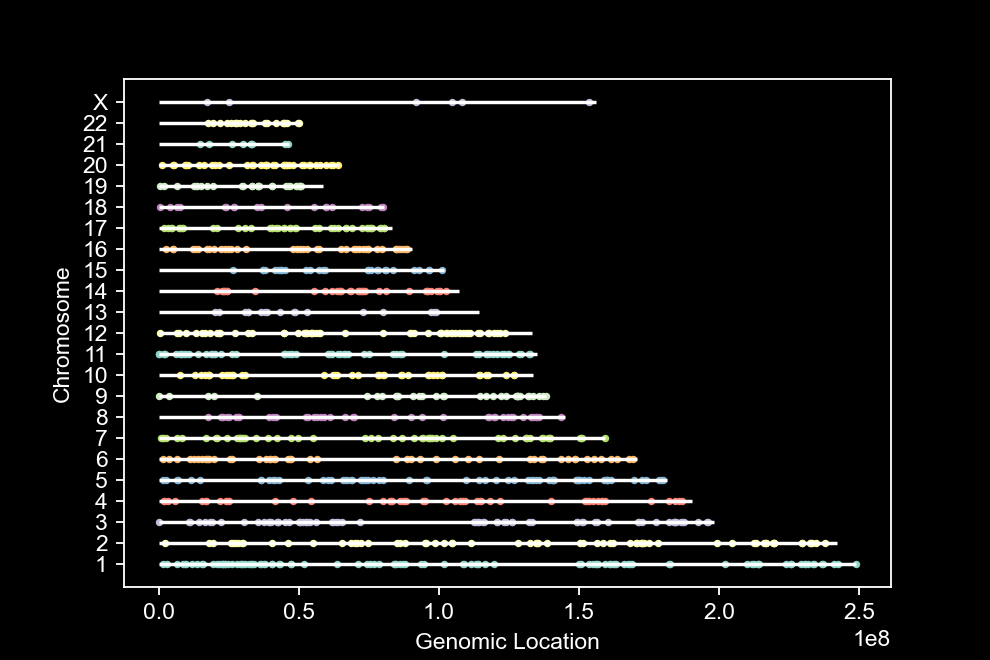

In [24]:
plt.style.use('dark_background')

fig, ax = plt.subplots(figsize=(6,4),dpi=150)
for _i, _chr in enumerate(sorted_chrs):
    ax.hlines(_i, 0, chr_2_len[_chr], color='white')
    ax.scatter(chr_2_centers[_chr], np.ones(len(chr_2_centers[_chr]))* _i, s=5)
ax.set_yticks(np.arange(len(sorted_chrs)))
ax.set_yticklabels(sorted_chrs)
#ax.set_xlim([0, chr_2_len['1']])
ax.set_xlabel("Genomic Location")
ax.set_ylabel("Chromosome")
plt.savefig(os.path.join(library_folder, 'target_location_summary.png'), dpi=300, transparent=True)
plt.show()

In [23]:
library_folder

'\\\\10.245.74.212\\Chromatin_NAS_2\\Chromatin_Libraries\\CTP-14_human_brain\\human_brain_promoter_enhancer'